In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
#standartiniai moduliai :imp
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
#import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns
import os
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4
import warnings
warnings.filterwarnings('ignore')

d:\Git\Jupyternotebooks


In [2]:
dus14= pd.read_csv('DUS2014.csv')
dus18= pd.read_csv('DUS2018.csv')

In [3]:
dus14s= dus14[['lytis', 'amzius','issilavinimas','bdu_spalio','profesija']]

In [4]:
dus18s= dus18[['lytis', 'amzius','issilavinimas','bdu_spalio','profesija']]

In [11]:
# suraskite ir išspausdinkite vidutinius vyrų bei moterų atlyginimus (spalio)
# 2014 ir 2018 metams.
moterys2014=dus14[(dus14['lytis']=='F')]
moterys2018=dus18[(dus18['lytis']=='F')]
vyrai2014=dus14[(dus14['lytis']=='M')]
vyrai2018=dus18[(dus18['lytis']=='M')]
                #   vyrai=dus14[(dus14['lytis']=='M')& (dus14['issilavinimas']=='G1')]]
print('vyru 2018', vyrai2018['bdu_spalio'].mean())
print('moteru 2018', moterys2018['bdu_spalio'].mean())
print('vyru 2014', vyrai2014['bdu_spalio'].mean()/3.4528)
print('moteru 2014', moterys2014['bdu_spalio'].mean()/3.4528)

vyru 2018 1014.4962626801922
moteru 2018 832.1469450889405
vyru 2014 762.7704309291468
moteru 2014 607.4431355450901


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
bdu_spalio= dus14s['bdu_spalio'].values #pridedi reiksmes kaip i zodyna
bdu_eurais= bdu_spalio/3.4528
dus14s['bduEUR']=bdu_eurais
dus14s.head(10)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bduEUR
0,M,20-29,G4,6.00,261,1.737720
1,F,20-29,G2,6.00,334,1.737720
2,F,40-49,G4,6.00,221,1.737720
3,F,30-39,G4,6.00,332,1.737720
4,M,40-49,G2,11.33,962,3.281395
5,M,30-39,G2,6.00,122,1.737720
6,M,60+,G4,6.00,221,1.737720
7,F,20-29,G2,13.33,531,3.860635
8,M,20-29,G1,6.67,912,1.931766
9,M,40-49,G2,6.00,332,1.737720


In [13]:
dus14s['bduEUR']= dus14s['bdu_spalio']/3.4528

In [14]:
#.query()
dus14s.query('lytis == "M"')

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bduEUR
0,M,20-29,G4,6.00,261,1.737720
4,M,40-49,G2,11.33,962,3.281395
5,M,30-39,G2,6.00,122,1.737720
6,M,60+,G4,6.00,221,1.737720
8,M,20-29,G1,6.67,912,1.931766
...,...,...,...,...,...,...
44925,M,40-49,G4,7849.67,134,2273.421571
44927,M,30-39,G4,1793.00,231,519.288693
44931,M,50-59,G4,3246.00,232,940.106580
44934,M,60+,G4,3819.67,231,1106.252896


In [15]:
dus14s.query('lytis == "M" and issilavinimas == "G3"')

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bduEUR
11,M,20-29,G3,9.67,315,2.800626
18,M,60+,G3,6.00,312,1.737720
19,M,20-29,G3,6.00,333,1.737720
21,M,20-29,G3,28.67,241,8.303406
25,M,50-59,G3,6.00,261,1.737720
...,...,...,...,...,...,...
44805,M,40-49,G3,3685.00,233,1067.249768
44808,M,60+,G3,2692.00,235,779.657090
44843,M,20-29,G3,1625.00,235,470.632530
44914,M,40-49,G3,3444.33,234,997.546918


In [16]:
edu= input('iveskite issilavinimo koda (G1,G2,G3,G4)')
ats= dus14s.query('issilavinimas== @edu') # @ yra buuutinas! nurodo, kad jo eik ieskoti isoreje
ats.head()

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bduEUR
10,F,40-49,G3,10.00,334,2.896200
11,M,20-29,G3,9.67,315,2.800626
13,F,20-29,G3,9.00,332,2.606580
16,F,30-39,G3,6.00,241,1.737720
18,M,60+,G3,6.00,312,1.737720


In [41]:
# parašykite for ciklą, kuris išspausdintų išsilavinimo kodą ir vidutinį atlyginimą
# respondentų su tuo išsilavinimo kodu.
# naudokite .query() metodą
edus = ['G1', 'G2', 'G3', 'G4']
ats= dus14s.query('issilavinimas == "@G2"')
ats1= dus14s.query('issilavinimas == "@G1"')
ats3= dus14s.query('issilavinimas == "@G3"')
ats4= dus14s.query('issilavinimas == "@G4"')
# for i in edus:
#     if i == 'G1':
#         # ats1= dus14s.query('issilavinimas == "@G1"')
#         print(ats1['bdu_spalio'].mean())
#     elif i =='G2':
#         # ats= dus14s.query('issilavinimas == "@G2"')
#         print(ats['bdu_spalio'].mean())
#     elif i =='G3':
#         # ats3= dus14s.query('issilavinimas == "@G3"')
#         print(ats3['bdu_spalio'].mean())
#     else:
#         # ats4= dus14s.query('issilavinimas == "@G4"')
#         print(ats4['bdu_spalio'].mean())
for i in edus:
    vidurkis = dus14s.query('issilavinimas == @i')["bduEUR"].mean() 
    print(i, vidurkis)



G1 474.7446499958954
G2 543.8925813045148
G3 730.4106784275447
G4 1011.9653972982893


In [42]:
# parašykite for ciklą, kuris išspausdintų išsilavinimo kodą ir vidutinį atlyginimą
# respondentų su tuo išsilavinimo kodu.
# naudokite .query() metodą
edus = ['G1', 'G2', 'G3', 'G4']
# g1_issilavinimas = dus14s.query('issilavinimas == "G1"')
for kodas in edus:
    vidurkis = dus14s.query('issilavinimas == @kodas')['bduEUR'].mean()
    print(kodas, vidurkis)

G1 474.7446499958954
G2 543.8925813045148
G3 730.4106784275447
G4 1011.9653972982893


In [43]:
#apply metodas
def LtLtoEuro(litas):
    euras= litas/3.4528
    return euras

dus14s['Eurai is funkcijos']=dus14s['bdu_spalio'].apply(LtLtoEuro) #pridedi papildoma eilute i lentele


In [44]:
dus14s.head(6)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bduEUR,Eurai is funkcijos
0,M,20-29,G4,6.00,261,1.737720,1.737720
1,F,20-29,G2,6.00,334,1.737720,1.737720
2,F,40-49,G4,6.00,221,1.737720,1.737720
3,F,30-39,G4,6.00,332,1.737720,1.737720
4,M,40-49,G2,11.33,962,3.281395,3.281395
5,M,30-39,G2,6.00,122,1.737720,1.737720


In [66]:
# parašykite kodą, kuris pridėtų naują stulpelį prie d14s lentelės
#  kur būtų tokie žodžiai:
# Vyras, jei stulpelyje lytis buvo M raidė
# Moteris, jei stulpelyje lytis buvo F raidė
# moterys2014=dus14[(dus14['lytis']=='F')]
# dus14s.head(10)
# ats1= dus14s.query('lytis == "M"')
# ats= dus14s.query('lytis == "F"')
# if dus14s.query('lytis == "M"'):
#     dus14s['LYTIS']= 'vyras'
# # ats['LYTIS']= 'moteris'
# # ats1['LYTIS']= ' vyras'
# dus14s.head(10)
def ltlytis(lytis):
    if lytis == 'M':
        return 'Vyras'
    else:
        return 'Moteris'
dus14s['Lytis lietuviskai']= dus14s['lytis'].apply(ltlytis)
dus14s.head(10)


,lytis,amzius,issilavinimas,bdu_spalio,profesija,bduEUR,Eurai is funkcijos,LYTIS,Lytis lietuviskai
0,M,20-29,G4,6.00,261,1.737720,1.737720,moteris,Vyras
1,F,20-29,G2,6.00,334,1.737720,1.737720,moteris,Moteris
2,F,40-49,G4,6.00,221,1.737720,1.737720,moteris,Moteris
3,F,30-39,G4,6.00,332,1.737720,1.737720,moteris,Moteris
4,M,40-49,G2,11.33,962,3.281395,3.281395,moteris,Vyras
5,M,30-39,G2,6.00,122,1.737720,1.737720,moteris,Vyras
6,M,60+,G4,6.00,221,1.737720,1.737720,moteris,Vyras
7,F,20-29,G2,13.33,531,3.860635,3.860635,moteris,Moteris
8,M,20-29,G1,6.67,912,1.931766,1.931766,moteris,Vyras
9,M,40-49,G2,6.00,332,1.737720,1.737720,moteris,Vyras


In [69]:
nypd= pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_DATE','OCCUR_TIME']) #sepratoriuje nurodai per ka atskiri
nypd.head(2)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,201575314,2019-08-23,2024-04-11 22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,205748546,2019-11-27,2024-04-11 15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571


In [70]:
nypd= pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates={'DATA':['OCCUR_DATE','OCCUR_TIME']})
nypd.head()

,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,2019-08-23 22:10:00,201575314,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,2019-11-27 15:54:00,205748546,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571
2,2019-02-02 19:40:00,193118596,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,40.791916,-73.945480
3,2019-10-24 00:52:00,204192600,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,BLACK,25-44,F,BLACK,40.638064,-74.166108
4,2019-08-22 18:03:00,201483468,BRONX,46,0.0,NaN,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,40.854547,-73.913339


In [72]:
# .dt modulis, veikia ti ktada, kai
# stulpelis Dataframe yra datetime tipo
nypdsmall= nypd[['DATA', 'BORO', 'STATISTICAL_MURDER_FLAG']]
nypdsmall.head()

,DATA,BORO,STATISTICAL_MURDER_FLAG
0,2019-08-23 22:10:00,QUEENS,False
1,2019-11-27 15:54:00,BRONX,False
2,2019-02-02 19:40:00,MANHATTAN,False
3,2019-10-24 00:52:00,STATEN ISLAND,True
4,2019-08-22 18:03:00,BRONX,False


In [84]:
nypdsmall['MonthNumber']=nypdsmall['DATA'].dt.month
nypdsmall['Hour']=nypdsmall['DATA'].dt.hour
nypdsmall['HR']=nypdsmall['DATA'].dt.round('H').dt.hour
nypdsmall['MonthName']=nypdsmall['DATA'].dt.month_name()
nypdsmall.head()
# sukurkite du naujus stulpelius
# viename turi būti paros laikas ('Rytas, Vakaras, etc)
# kitame metų laikas (žiema, vasara, etc)
# naudokite stulpelius Hour ir MonthNr
def para(HR):
    if HR >5 and HR<12:
        return 'Rytas'
    elif HR> 11 and HR<18:
        return "diena"
    elif HR>17 and HR<23:
        return 'vakaras'
    else:
        return "naktis"
def metai(month):
    if month>=3 and month <=5:
        return 'pavasaris'
    elif month >= 6 and month<=8:
        return 'vasara'
    elif month >=9 and month <=11:
        return 'ruduo'
    else:
        return 'ziema'

nypdsmall['Paros metas']=nypdsmall['HR'].apply(para)
nypdsmall['metu laikas']=nypdsmall['MonthNumber'].apply(metai)
nypdsmall.head(3)

,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNumber,Hour,MonthName,HR,Paros metas,metu laikas
0,2019-08-23 22:10:00,QUEENS,False,8,22,August,22,vakaras,vasara
1,2019-11-27 15:54:00,BRONX,False,11,15,November,16,diena,ruduo
2,2019-02-02 19:40:00,MANHATTAN,False,2,19,February,20,vakaras,ziema


In [89]:
nypdsmall['MonthName'].value_counts().sort_values(ascending=True) #cia permas stulpelis- index, antras- values
#galima sort.index

MonthName
February     1098
March        1331
January      1411
November     1550
April        1578
December     1601
October      1851
September    2033
May          2037
June         2192
August       2462
July         2482
Name: count, dtype: int64

In [90]:
shootings= nypdsmall['MonthName'].value_counts()
months= shootings.index
counts= shootings.values
print(months,counts,sep='\n')

Index(['July', 'August', 'June', 'May', 'September', 'October', 'December',
       'April', 'November', 'January', 'March', 'February'],
      dtype='object', name='MonthName')
[2482 2462 2192 2037 2033 1851 1601 1578 1550 1411 1331 1098]


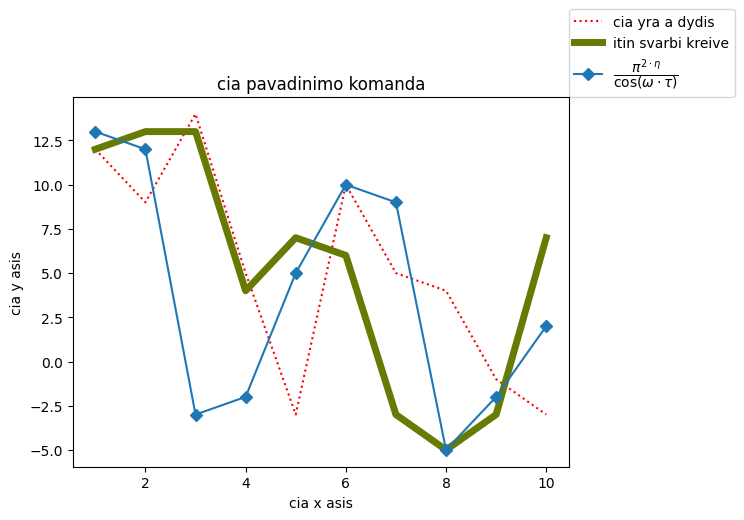

In [115]:
#plt.subplots()
a= np.arange(1,11)
b= np.random.randint(-5,15,10)
c= np.random.randint(-5,15,10)
d= np.random.randint(-5,15,10)
langas, grafikas = plt.subplots() # (1,2, figsize=[8,4.5]) #16:9
# .plot() metodas
grafikas.plot(a,b, label='cia yra a dydis', linestyle=':', color='red')
grafikas.plot(a,c, label= 'itin svarbi kreive', linewidth=5, color= 'xkcd:olive green')
grafikas.plot(a,d, label = r'$\dfrac{\pi^{2\cdot \eta}}{\cos(\omega\cdot\tau)}$', marker='D')

#grafikas.legend(loc='upper left') 
# varaintai be best - 'best', 'upper right', 'upper left', 'lower left', 
#'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
grafikas.set_xlabel("cia x asis")
grafikas.set_ylabel('cia y asis')
grafikas.set_title('cia pavadinimo komanda')
grafikas.legend(loc=[1,1])
plt.show()

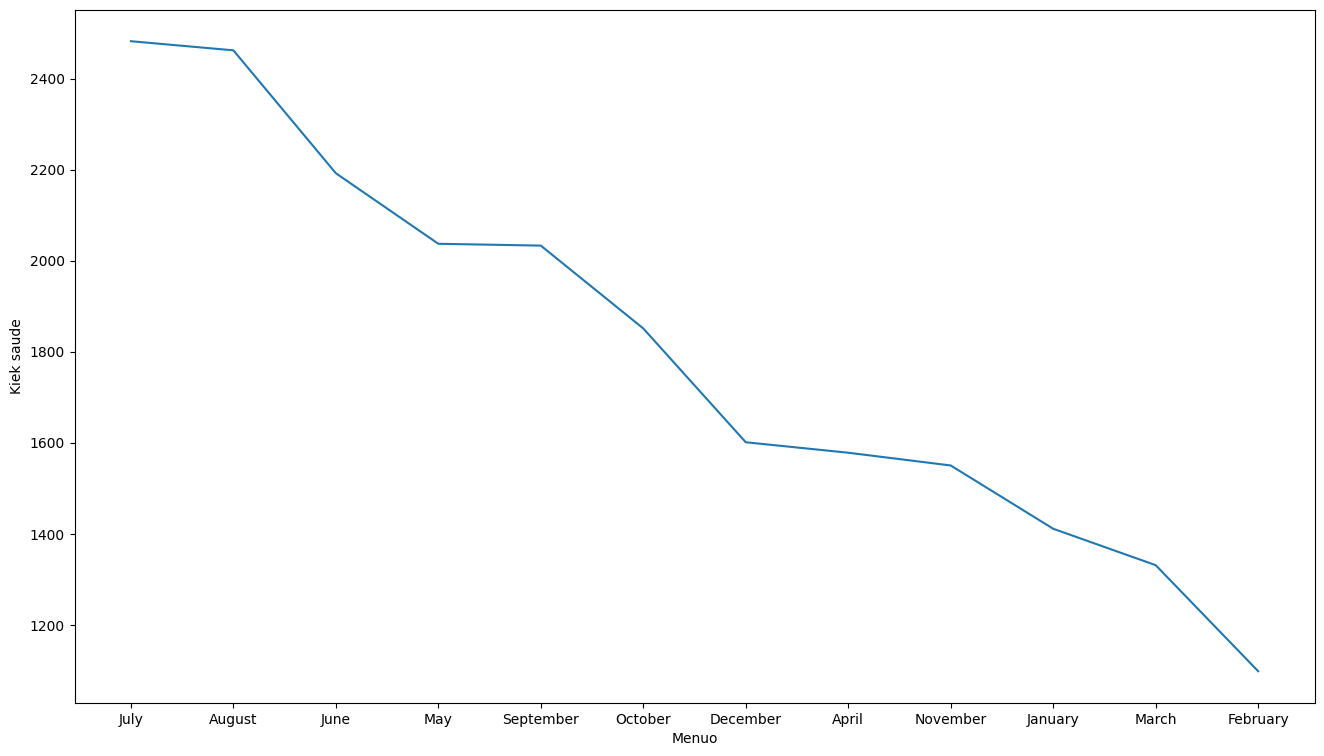

In [124]:
# turite nypd susišaudymų duomenis.
# nubraižykite vizualizaciją, naudodami ką tik pateiktą pavyzdį, 
# kad matytumėme, kurį monėsį yra daugiausiai, mažiausiai užfiksduotų
# susišaudymų
# sudėkite prasmingus ašių pavadinimus
langas, grafikas=plt.subplots(figsize=[16,9])

grafikas.plot(nypdsmall['MonthName'].value_counts())
#grafikas.plot(nypdsmall['MonthName'].value_counts().sort_index(ascending=True).values)
# grafikas.plot(a,b, label='cia yra a dydis', linestyle=':', color='red')
# grafikas.plot(a,c, label= 'itin svarbi kreive', linewidth=5, color= 'xkcd:olive green')
# grafikas.plot(a,d,label = r'$\dfrac{\pi^{2\cdot \eta}}{\cos(\omega\cdot\tau)}$', marker='D')
grafikas.set_xlabel('Menuo')
grafikas.set_ylabel('Kiek saude')
plt.show()

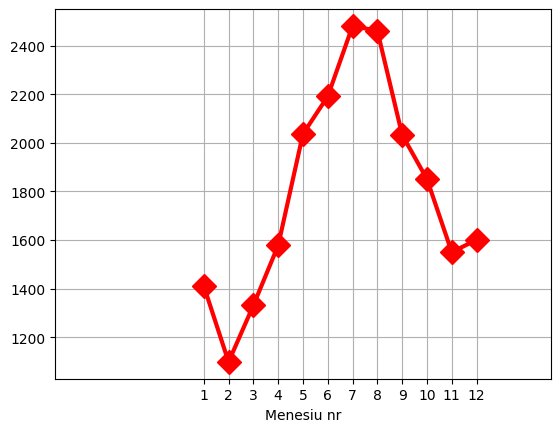

In [133]:
monthscount= nypdsmall['MonthNumber'].value_counts().sort_index(ascending=True)
months= monthscount.index
counts= monthscount.values

fig, ax= plt.subplots()
ax.plot(months, counts, lw=3, c='red', marker= 'D', ms=12)

ax.set_xticks(months) #x asies norimu skaiciu palikimas
ax.set_xlabel('Menesiu nr')
ax.set_xlim(-5,15) #x asies ribu keitimas
ax.grid()#tinklelis

plt.show()

In [134]:
nypdsmall[['MonthName','MonthNumber']].value_counts().reset_index().sort_values(by='MonthNumber')

,MonthName,MonthNumber,count
9,January,1,1411
11,February,2,1098
10,March,3,1331
7,April,4,1578
3,May,5,2037
2,June,6,2192
0,July,7,2482
1,August,8,2462
4,September,9,2033
5,October,10,1851


KeyError: 0

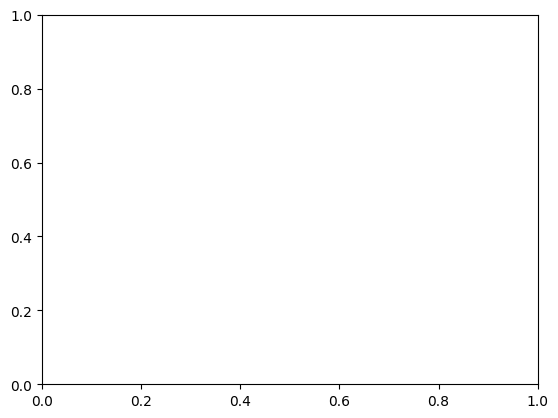

In [138]:
months= nypdsmall[['MonthName','MonthNumber']].value_counts().reset_index().sort_values(by='MonthNumber')
fig, ax = plt.subplots()

mnames= months['MonthName'].values
mnumbers= months ['MonthNumber']
counts= months[0].values

ax.plot(mnumbers, counts, marker='D', c='green')
ax.set_xticks(mnumbers)
ax.set_xticklabels(mnames, rotation= 90)

plt.show()

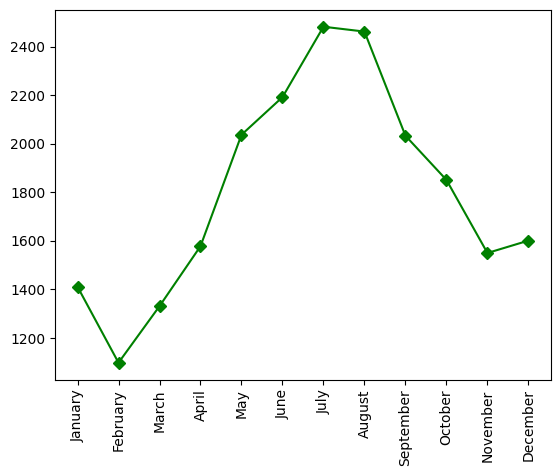

In [147]:
months = nypdsmall[['MonthName', 'MonthNumber']].value_counts().reset_index().sort_values(by='MonthNumber')
fig, ax = plt.subplots()

mnames = months['MonthName'].values
mnumbers = months['MonthNumber']
counts = months['count'].values

ax.plot(mnumbers, counts, marker='D', c='green')
ax.set_xticks(mnumbers)
ax.set_xticklabels(mnames, rotation=90)

plt.show()

In [145]:
nypdsmall[['MonthName', 'MonthNumber']].value_counts().reset_index()

,MonthName,MonthNumber,count
0,July,7,2482
1,August,8,2462
2,June,6,2192
3,May,5,2037
4,September,9,2033
5,October,10,1851
6,December,12,1601
7,April,4,1578
8,November,11,1550
9,January,1,1411


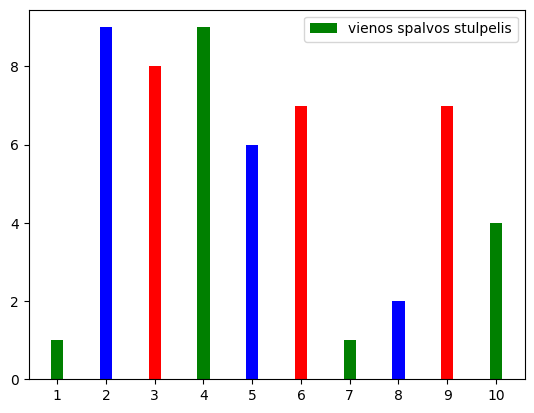

In [169]:
# bar grafikai
a= np.arange(1,11)
b= np.random.randint(1,11,10)
colorlist= ['green','blue','red'] #cia, kad galetum spalvint kelis stulpelius kitaip

fig, ax = plt.subplots()

ax.bar(a,b, color=colorlist, width=0.25, label= 'vienos spalvos stulpelis')
ax.set_xticks(a)
ax.legend(loc='best')

plt.show()

In [ ]:
#ctrl+shift+p

In [2]:
#standartiniai moduliai :imp
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
#import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns
import os
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4
import warnings
warnings.filterwarnings('ignore')

d:\Git\Jupyternotebooks


In [ ]:
fig, axis = plt.subplots(figsize=(fwidth,fheight))  #:sfig
#plotting code: 


#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [ ]:
#:sfig4h
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(fwidth*2,fheight*2), gridspec_kw={'width_ratios':[1,1], 'height_ratios':[1,1]})
#ax1:
#plotting code:


#ax1.legend(loc='best')
#ax2:
#plotting code:


#ax2.legend(loc='best')
#ax3:
#plotting code:


#ax3.legend(loc='best')
#ax4:
#plotting code:


#ax4.legend(loc='best')
fig.tight_layout()
plt.show()

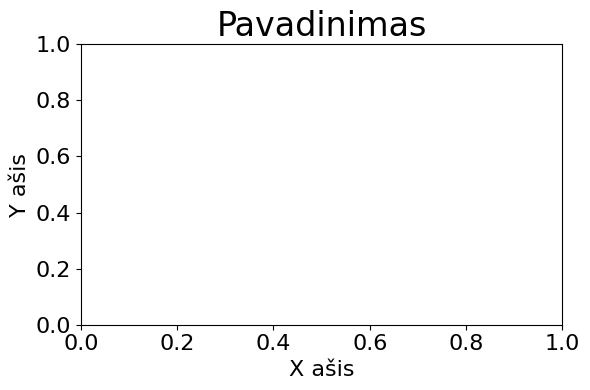

In [6]:
#:fig
fig, axis = plt.subplots(figsize=(fwidth,fheight))
#plotting code:


axis.set_xlabel('X ašis', fontsize=fontsize)
axis.set_ylabel('Y ašis', fontsize=fontsize)
axis.set_title('Pavadinimas', fontsize=titlesize)
axis.tick_params(axis='x', labelsize=labelsize)
axis.tick_params(axis='y', labelsize=labelsize)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [27]:
#Nuskaitykite DUS2014csv ir DUS2018.csv į pandas lenteles

# .query(), .value_counts():
# Kiek dalyvavo vyrų, moterų apklausoje kiekvienais metais. Suraskite pokytį,
# rezultatus išspausdinkite

dus2014= pd.read_csv('DUS2014.csv')
dus2018= pd.read_csv('DUS2018.csv')

moterys2014= dus2014[dus2014['lytis']=='F']
moterys2018= dus2018[dus2018['lytis']=='F']
vyrai2014= dus2014[dus2014['lytis']=='M']
vyrai2018= dus2018[dus2018['lytis']=='M']

moterusk14=moterys2014['lytis'].value_counts().values[0]
moterusk18=moterys2018['lytis'].value_counts().values[0]
vyrusk14=vyrai2014['lytis'].value_counts().values[0]
vyrusk18=vyrai2018['lytis'].value_counts().values[0]

moteruskpokytis= (moterusk14- moterusk18)
vyrupokytis=(vyrusk14-vyrusk18)

print('moteru pokytis', moteruskpokytis,'vyru pokytis', vyrupokytis)

# kiek 2018 metais buvo respondentų iš kiekvienos amžiaus grupės?
# Suraskite vidutinius atlyginimus kiekvienai amžiaus grupei (2018 metams)
# hint:as for ciklas moka eiti per array vertes, kurias gausite su .index arba .values atributais

amzius18=dus2018.query('amzius == "20-29"')
amzius18.head()



# def metai(month):
#     if month>=3 and month <=5:
#         return 'pavasaris'
#     elif month >= 6 and month<=8:
#         return 'vasara'
#     elif month >=9 and month <=11:
#         return 'ruduo'
#     else:
#         return 'ziema'

# nypdsmall['Paros metas']=nypdsmall['HR'].apply(para)
# nypdsmall['metu laikas']=nypdsmall['MonthNumber'].apply(metai)


moteru pokytis 1678 vyru pokytis 110


,svoris,stazas,darbo_laiko_dalis,evrk,im_dydzio_kodas,im_dydis,amzius,atostogu_dienos,sutarties_rusis,virsvalandziu_bdu,...,sutartis,apmoketos_val,bdu_val,nuts,virsvalandziu_sk,premijos,bdu_spalio,priemokos,objectid,issilavinimas


In [25]:
moterys2014['lytis'].value_counts().values #taip gauni arrayju

array([22366], dtype=int64)

In [52]:
# kiek 2018 metais buvo respondentų iš kiekvienos amžiaus grupės?
# Suraskite vidutinius atlyginimus kiekvienai amžiaus grupei (2018 metams)
# hint:as for ciklas moka eiti per array vertes, kurias gausite su .index arba .values atributais
amzius20=dus2018.query('amzius == "14-29"')
amzius20.head()
amzius30=dus2018.query('amzius == "30-39"')
amzius30.head()
amzius40=dus2018.query('amzius == "40-49"')
amzius40.head()
amzius50=dus2018.query('amzius == "50-59"')
amzius50.head()
amzius60=dus2018.query('amzius == "60+"')
amzius60.head()


,svoris,stazas,darbo_laiko_dalis,evrk,im_dydzio_kodas,im_dydis,amzius,atostogu_dienos,sutarties_rusis,virsvalandziu_bdu,...,sutartis,apmoketos_val,bdu_val,nuts,virsvalandziu_sk,premijos,bdu_spalio,priemokos,objectid,issilavinimas
12,24.30,18,50,XM,1,50_249,60+,12,A,0,...,N,91,2.47,LT,0,0,225,0,13,G2
29,9.93,10,100,XD,1,50_249,60+,23,A,0,...,N,183,2.50,LT,0,0,457,0,30,G2
42,10.59,21,100,XD,1,50_249,60+,25,A,0,...,N,183,3.62,LT,0,200,663,0,43,G4
43,9.70,19,100,XD,1,50_249,60+,24,A,0,...,N,183,4.13,LT,0,1453,756,0,44,G2
48,1.92,19,50,XB,0,1_49,60+,10,A,0,...,N,92,4.35,LT,0,0,400,0,49,G2


In [57]:
amziai=dus2018['amzius'].value_counts().values
amziaii=dus2018['amzius'].value_counts().index
for x, y in zip(amziai, amziaii):
    print(x,y)
print('vidutinis atlyginimas 14-29 metu gr',amzius20['bdu_spalio'].mean(),' Eur')
print('vidutinis atlyginimas 30-39 metu gr',amzius30['bdu_spalio'].mean(),' Eur')
print('vidutinis atlyginimas 40-49 metu gr',amzius40['bdu_spalio'].mean(),' Eur')
print('vidutinis atlyginimas 50-59 metu gr',amzius50['bdu_spalio'].mean(),' Eur')
print('vidutinis atlyginimas 60+ metu gr',amzius60['bdu_spalio'].mean(),' Eur')


10056 50-59
9421 40-49
9368 14-29
9282 30-39
5037 60+
vidutinis atlyginimas 14-29 metu gr 865.5633005977796  Eur
vidutinis atlyginimas 30-39 metu gr 1088.9557207498383  Eur
vidutinis atlyginimas 40-49 metu gr 980.8554293599406  Eur
vidutinis atlyginimas 50-59 metu gr 856.0671241050119  Eur
vidutinis atlyginimas 60+ metu gr 784.542386341076  Eur


In [58]:
amz=amziaii
for amzius in amz:
    atrinkti= dus2018.query('amzius==@amzius')
    vidatlyginimas= atrinkti['bdu_spalio'].mean()
    print(amzius, vidatlyginimas)

50-59 856.0671241050119
40-49 980.8554293599406
14-29 865.5633005977796
30-39 1088.9557207498383
60+ 784.542386341076


In [83]:
issilavinimai=dus2018['issilavinimas'].value_counts().index
for g in issilavinimai:
    reikalingas=dus2018.query('issilavinimas== @g')
    atlygis=reikalingas['bdu_spalio'].mean()
    print(g, atlygis)

G2 732.6871572212066
G3 1094.7640256572408
G4 1246.4511960095226
G1 626.3916786226686


In [78]:
# Palyginkite, kiek procentais daugiau uždirbo vyrai už moteris 2018 metais?++
# Kiek procentais vyrai uždirba daugiau, nei bendras atlyginimų vidurkis?++
# Kiek procentais moterys uždirba mažiau, nei bendras atlyginimų vidurkis? ++
# imkite bdu_spalio
print(vyrai2018['bdu_spalio'].mean())
print(moterys2018['bdu_spalio'].mean())
print('vyrai uzdirbo',round((vyrai2018['bdu_spalio'].mean()/moterys2018['bdu_spalio'].mean()-1)*100,2),'procentu daugiau negu moterys')
print(dus2018['bdu_spalio'].mean())
print('vyrai uzdirbo',round(vyrai2018['bdu_spalio'].mean()/(dus2018['bdu_spalio'].mean())*10,2),'procentu daugiau uz vidurki')
print('moterys uzdirbo',round(dus2018['bdu_spalio'].mean()/moterys2018['bdu_spalio'].mean()*10,2),'procentu maziau uz vidurki')

1014.4962626801922
832.1469450889405
vyrai uzdirbo 21.91 procentu daugiau negu moterys
927.0983690112131
vyrai uzdirbo 10.94 procentu daugiau uz vidurki
moterys uzdirbo 11.14 procentu maziau uz vidurki


In [12]:
# Nuskaitykite aruodas.csv failą ++
# Pridėkite prie DataFrame'o naują stulpelį "KainaS", kur būtų skaičiai (float'ai) iš stulpelio "€/S"
# tam panaudokite savo sukurtą funkciją, kuri tekstą verstų į float'us
# bei .apply() metodą
# Suraskite vidutinę kv. m. kainą.

aruodas=pd.read_csv('aruodas.csv')
# aruodasS=aruodas['€/S']
def kainas(kaina):
    ss= float(kaina[:-4])
    return ss
aruodas['KainaS']= aruodas['€/S'].apply(kainas)

aruodas.head()
# for i in aruodasS
# aruodas['KainaS']= aruodas['€/S']
# print(aruodas)

# def metai(month):
#     if month>=3 and month <=5:
#         return 'pavasaris'
#     elif month >= 6 and month<=8:
#         return 'vasara'
#     elif month >=9 and month <=11:
#         return 'ruduo'
#     else:
#         return 'ziema'

# nypdsmall['Paros metas']=nypdsmall['HR'].apply(para)
# nypdsmall['metu laikas']=nypdsmall['MonthNumber'].apply(metai)

# nypdsmall['HR']=nypdsmall['DATA'].dt.round('H').dt.hour
# def LtLtoEuro(litas):
#     euras= litas/3.4528
#     return euras

# dus14s['Eurai is funkcijos']=dus14s['bdu_spalio'].apply(LtLtoEuro)

,Unnamed: 0,Linkas,Adresas,Kaina,€/S,Aukštas,Plotas,Kambariai,KainaS
0,0,https://www.aruodas.lt/butai-vilniuje-lazdynel...,"Lazdynėliai, Žaibo g.",155 000 €,3690€/m²,4/4,42.00,2,3690.0
1,1,https://www.aruodas.lt/butai-vilniuje-pasilaic...,"Pašilaičiai, Pavilnionių g.",125 880 €,2977€/m²,4/4,42.28,2,2977.0
2,2,https://www.aruodas.lt/butai-vilniuje-lazdynel...,"Lazdynėliai, Žaibo g.",166 000 €,3773€/m²,2/4,44.00,2,3773.0
3,3,https://www.aruodas.lt/butai-vilniuje-pasilaic...,"Pašilaičiai, Perkūnkiemio g.",109 900 €,3283€/m²,7/12,33.48,1,3283.0
4,4,https://www.aruodas.lt/butai-vilniuje-pilaitej...,"Pilaitė, Pilkalnio g.",137 000 €,3703€/m²,4/4,37.00,2,3703.0


In [7]:
f= '3690€/m²'
def konvertas (sk):
    elementas= float(sk[:-4])
    return elementas
print(konvertas(f))

3690.0


In [10]:
# Nuskaitykite aruodas.csv failą ++
# Pridėkite prie DataFrame'o naują stulpelį "KainaS", kur būtų skaičiai (float'ai) iš stulpelio "€/S"
aruodas['KainaS']= aruodas['€/S'].apply(konvertas)

aruodas.head()
# tam panaudokite savo sukurtą funkciją, kuri tekstą verstų į float'us
# bei .apply() metodą
# Suraskite vidutinę kv. m. kainą.
print(aruodas['KainaS'].mean())
aruodas.head()

3301.46678555506


,Unnamed: 0,Linkas,Adresas,Kaina,€/S,Aukštas,Plotas,Kambariai,KainaS
0,0,https://www.aruodas.lt/butai-vilniuje-lazdynel...,"Lazdynėliai, Žaibo g.",155 000 €,3690€/m²,4/4,42.00,2,3690.0
1,1,https://www.aruodas.lt/butai-vilniuje-pasilaic...,"Pašilaičiai, Pavilnionių g.",125 880 €,2977€/m²,4/4,42.28,2,2977.0
2,2,https://www.aruodas.lt/butai-vilniuje-lazdynel...,"Lazdynėliai, Žaibo g.",166 000 €,3773€/m²,2/4,44.00,2,3773.0
3,3,https://www.aruodas.lt/butai-vilniuje-pasilaic...,"Pašilaičiai, Perkūnkiemio g.",109 900 €,3283€/m²,7/12,33.48,1,3283.0
4,4,https://www.aruodas.lt/butai-vilniuje-pilaitej...,"Pilaitė, Pilkalnio g.",137 000 €,3703€/m²,4/4,37.00,2,3703.0


In [24]:
#Dar su aruodas.csv:
# Suraskite, kiek buvo pigių, kiek buvo brangių butų (mažiau už vidutinę
# kainą, daugiau nei vidutinė kaina)
#Suraskite vidutinį butų plotą.

vidurkis= aruodas['KainaS'].mean()
def daugiau(kaina):
    if kaina> vidurkis:
        return 'brangus'
    else:
        return 'pigus'
aruodas['Pigu/Brangu']= aruodas['KainaS'].apply(daugiau)


pindex= aruodas['Pigu/Brangu'].value_counts().index
pigus= aruodas['Pigu/Brangu'].value_counts().values
print(pindex, pigus)
for x,y in zip(pigus, pindex):
    print(x, y)
aruodas['Plotas'].mean()

Index(['pigus', 'brangus'], dtype='object', name='Pigu/Brangu') [1283  960]
1283 pigus
960 brangus


60.41541685242979

In [27]:
nypd.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,201575314,08/23/2019,22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,205748546,11/27/2019,15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571
2,193118596,02/02/2019,19:40:00,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,40.791916,-73.945480
3,204192600,10/24/2019,00:52:00,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,BLACK,25-44,F,BLACK,40.638064,-74.166108
4,201483468,08/22/2019,18:03:00,BRONX,46,0.0,NaN,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,40.854547,-73.913339


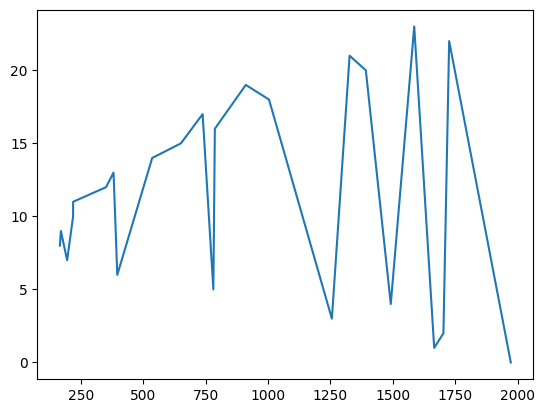

In [48]:
#NYPD failas:
#Su vizualizacija:
#Kurios valandos, kurie paros metai buvo pavojingiausi susišaudymų prasme?
#A) Kuriose valandose mirtinų susišaudymų kiekis buvo didžiausias?
#B) Kuriose valandose procentinis mirtinų susišaudymų kiekis yra didžiausias?
#Ar A ir B valandos sutampa, arne?
nypd=pd.read_csv('NYPD_Shooting.csv',sep=';',parse_dates={'DATA':['OCCUR_DATE','OCCUR_TIME']})
nypd['MonthNumber']=nypd['DATA'].dt.month
nypd['Hour']=nypd['DATA'].dt.hour
nypd['HR']=nypd['DATA'].dt.round('H').dt.hour
nypd['MonthName']=nypd['DATA'].dt.month_name()
nypd.head()
nusikaltimai= nypd['HR'].value_counts().values
indnusikaltimai= nypd['HR'].value_counts().index
langas, grafikas= plt.subplots()
grafikas.plot(nusikaltimai,indnusikaltimai)

plt.show()

Index([False, True], dtype='bool', name='STATISTICAL_MURDER_FLAG')
17499


ValueError: x and y must have same first dimension, but have shapes (2,) and (21626,)

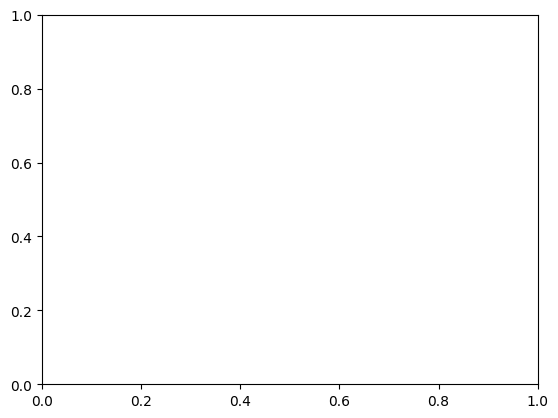

In [62]:
#A) Kuriose valandose mirtinų susišaudymų kiekis buvo didžiausias?
mirtini=nypd['STATISTICAL_MURDER_FLAG'].value_counts().values
mirtinind=nypd['STATISTICAL_MURDER_FLAG'].value_counts().index
print(mirtinind)
print(mirtini[0])
langas, grafikas=plt.subplots()
grafikas.plot(mirtini,nypd['HR'])
plt.show()

In [99]:
#Su life-exp.csv:
#atrinkite su .query() į naują lentelę tik 2019 metų duomenis. ++
# Toliau naudojama tik naujoji lentelė ++
# Suraskite vidutinę gyvenimo trukmę ++
# Suskirstykite valstybes į ilgaamžes ir ne ++
# jei gyvenimo trukmė mažiau nei vidurkis - neilgaamžė ++
# jei didesnė - ilgaamžė. ++
# Kiek buvo valstybių ilgaamžių, neilgaamžių? ++
life= pd.read_csv('life-exp.csv')
life.head()
gyv19=life.query("Year== 2019")
vid= gyv19['Life expectancy'].mean()
print('vidutine gyvenimo trukme 2019 metais lygi', vid)
def valstybes(sk):
    if sk< vid:
        return 'neilgaamze'
    else:
        return 'ilgaamze'
gyv19['Ilga, Trumpa']= gyv19['Life expectancy'].apply(valstybes)
gyv19.head()

ind = gyv19['Ilga, Trumpa'].value_counts().index
val = gyv19['Ilga, Trumpa'].value_counts().values
print('ilgaamziu valstybiu:', val[0], 'neilgaamziu valstybiu:', val[1])
print(val)

#Su Dar su life-exp.csv:
#Nuskaitykite failą++
#Suraskite vidutinę, minimalią, maksimalią gyvenimo trukmę Lietuvai, ++
salis= input("")
lt=life.query('Entity == @salis')
vidlt=lt['Life expectancy'].mean()
print('maximali',lt.max())
print('vidutine',vidlt)
print('minimali',lt.min())
# Latvijai, Švedijai, Vokietijai
# Padarykite, jog vartotojas galėtų įvesti, kokios šalies++

# duomenis reikia išvesti ++

#Bonus - .plot() vizualizacija tokių duomenų:
# gyvenimo trukmė kiekvienais metais Lietuvai ir vartotojo įvestai šaliai

vidutine gyvenimo trukme 2019 metais lygi 73.83298925497944
ilgaamziu valstybiu: 138 neilgaamziu valstybiu: 105
[138 105]
maximali Entity             Sweden
Code                  SWE
Year                 2019
Life expectancy    82.797
dtype: object
vidutine 77.40807692307692
minimali Entity             Sweden
Code                  SWE
Year                 1955
Life expectancy    72.446
dtype: object


In [134]:
#AUTO.CSV failas:
#Raskite vidutinę kainą, ridą visiems automobiliams bei atskirai šiems: BMW, Audi, Toyota, Vokswagen, Ford. ++
#Suskirstykite automobilius pagal santykį su vidutine kaina:
# < 0.75 avg - pigūs
# 0.75 iki 1.15 avg - vidutiniai, 
# > 1.15 avg - brangūs
# Kiek kiekvienoje grupėje buvo tokių auto?
#tai vizualizuokite su bar 
auto=pd.read_csv('auto.csv', sep= "|")
autosmall= auto[['gamintojas','rida','price']]
def konvertavimas(sk):
    try:
        sk= sk.replace(' ','')
        elem= float(sk[:-2])
    except:
        sk=0
        elem=float(sk)
    return elem
auto['normrida']= auto['rida'].apply(konvertavimas)
vid = auto['normrida'].mean()
print('vidutine visu rida',vid)
auto.head()
bmw= auto.query('gamintojas == "BMW"')
bmwvid= bmw['normrida'].mean()
print('vidutine bmw rida', bmwvid)
autosmall.head()
# vidkaina= autosmall['price'].mean()
# print(vidkaina)

vidutine visu rida 228206.50791666665
vidutine bmw rida 260654.4301369863


,gamintojas,rida,price
0,BMW,253 000 km,19 500
1,Mitsubishi,195 405 km,2 700
2,Seat,129 800 km,13 490
3,Skoda,183 000 km,14 650
4,Volvo,127 896 km,38 000


In [138]:
def konv(sk):
    tr= float(sk)
    return tr
autosmall['price']= pd.to_numeric(autosmall['price'],errors='coerce').apply(konv)
autosmall.head()
#autosmall['price'].mean()
vidkaina= autosmall['price'].mean()
print(vidkaina)



720.6576576576576


In [25]:
# duoti sąrašai:
x = [12,16,17,1,0,-1,-8,10,14]
y = ["Vilnius", 1323, 'Kaunas', 'Alytus', 'omega', -42, 42]
z = ["Vilnius", 1323,[4,5,6], 'Kaunas', 'Alytus', 'omega', -42, 42, [1,2,3]]
# su map () ir savo pasirašyta funkcija sugeneruokite naujus sąrašus, kur 
# būtų simbolių kiekiai iš sąrašų x ir y.
# advanced: skaidrėse susiraskite prie if'o is operatorių ir pavyzdžius su type()
# ir sugeneruokite naują sąrašą iš z'o:
#  kur tekstas - tai suskaičiuojate simbolių kiekį, kur skaičius - padauginate iš 2.5
#  kur sąrašas - randate sąrašo skaičiųą sumą
x1=[]
y1=[]
z1=[]
a=0
def sabacinam(b):
    simboliusk=[]
    for e in b:
        simboliusk.append(len(str(e)))
    return simboliusk

print(sabacinam(x))
def simboliai(elem):
    return len(str(elem))

x1= list(map(simboliai, x))
print(x1)
x2 = list(map(simboliai, y))


[2, 2, 2, 1, 1, 2, 2, 2, 2]
[2, 2, 2, 1, 1, 2, 2, 2, 2]
<class 'str'> True
<class 'list'> True
<class 'dict'> True
<class 'set'> True
<class 'float'> True
<class 'int'> True
<class 'tuple'> True


In [41]:
# advanced: skaidrėse susiraskite prie if'o is operatorių ir pavyzdžius su type()
# ir sugeneruokite naują sąrašą iš z'o:
#  kur tekstas - tai suskaičiuojate simbolių kiekį, kur skaičius - padauginate iš 2.5
#  kur sąrašas - randate sąrašo skaičiųą sumą
z = ["Vilnius", 1323,[4,5,6], 'Kaunas', 'Alytus', 'omega', -42, 42, [1,2,3]]
s = 'A'
lst = []
dct = {}
sets = set()
flt = 1.0
intgr = 7
tpl = (7,)
print(type(s), type(s) is str)
print(type(lst), type(lst) is list)
print(type(dct), type(dct) is dict)
print(type(sets), type(sets) is set)
print(type(flt), type(flt) is float)
print(type(intgr), type(intgr) is int)
print(type(tpl), type(tpl) is tuple)
def newfunc(a):
        if type(a) is int:
            return float(a)*2.5
        elif type(a) is str:
            return len(str(a))
        elif type(a) is list:
            return sum(a)

z2= list(map(newfunc,z))
print(z2)


<class 'str'> True
<class 'list'> True
<class 'dict'> True
<class 'set'> True
<class 'float'> True
<class 'int'> True
<class 'tuple'> True
[7, 3307.5, 15, 6, 6, 5, -105.0, 105.0, 6]


In [2]:
miestai = pd.read_excel('miestai.xlsx')
miestai.head()

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius
0,Vilnius,0,1323 m.,1387 m.,16,557440
1,Kaunas,102,1361 m.,1408 m.,13,286763
2,Klaipėda,311,1252 m.,1257–1258 m.,9,147898
3,Šiauliai,213,1236 m.,1713 m.,14,100119
4,Panevėžys,136,1503 m.,1791–1792 m.,11,87148


In [43]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
   --------- ----------------------------- 61.4/250.0 kB 469.7 kB/s eta 0:00:01
   ------------------------------- -------- 194.6/250.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 250.0/250.0 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
miestai = pd.read_excel('miestai.xlsx')
miestai.head()

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius
0,Vilnius,0,1323 m.,1387 m.,16,557440
1,Kaunas,102,1361 m.,1408 m.,13,286763
2,Klaipėda,311,1252 m.,1257–1258 m.,9,147898
3,Šiauliai,213,1236 m.,1713 m.,14,100119
4,Panevėžys,136,1503 m.,1791–1792 m.,11,87148


In [146]:
# Pridėkite du naujus stulpelius: Miesto amžius bei kiek metų jis turi miesto teises.++
# Su query() atrinkite miestus, kuriuose yra daugiau nei 50 tūkst žmonių,++
# raskite žmonių kiekio vidurkį.++
# Atrinkite miestus, įkurtus seniau, nei 1500 m, ir raskite bendrą gyventojų skaičių 
# šiuose miestuose.
def miestuamzius(miestas):
    return 2024-float(str(miestas)[:4])
miestai['miesto amzius']= miestai['Paminėjimo metai'].apply(miestuamzius)

def teises(teise):
    try:
        return 2024-float(str(teise)[:4])
    except:
        return -1
miestai['miesto teisiu amzius']= miestai['Gautos miesto teisės'].apply(teises)
miestai.head()


,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius,miesto amzius,miesto teisiu amzius
0,Vilnius,0,1323 m.,1387 m.,16,557440,701.0,637.0
1,Kaunas,102,1361 m.,1408 m.,13,286763,663.0,616.0
2,Klaipėda,311,1252 m.,1257–1258 m.,9,147898,772.0,767.0
3,Šiauliai,213,1236 m.,1713 m.,14,100119,788.0,311.0
4,Panevėžys,136,1503 m.,1791–1792 m.,11,87148,521.0,233.0


In [41]:
#dus14s.query('lytis == "M"')
gyv=miestai.query('`Gyventojų skaičius` > 50000') # jopapa jei yra tarpas, reik ap backtickint
gyv.head(20)
# print('moteru 2018', moterys2018['bdu_spalio'].mean())
print(gyv['Gyventojų skaičius'].mean())


204964.83333333334


In [47]:
# Atrinkite miestus, įkurtus seniau, nei 1500 m, ir raskite bendrą gyventojų skaičių 
# šiuose miestuose.
senimiestai=miestai.query('`miesto amzius` > 524')
print(senimiestai['Gyventojų skaičius'].mean())

28694.549019607843


In [59]:
miestai = pd.read_excel('miestai.xlsx')
miestai['Apskritis'] = miestai['Apskritis'].apply(str)
apskritys = pd.read_csv('apskritys.csv')
apskritys['Kodas'] = apskritys['Kodas'].apply(str)

In [60]:
#.merge()
miestaisuapskritimis= pd.merge(left=miestai,right=apskritys,left_on='Apskritis',right_on='Kodas', how= 'inner')
miestaisuapskritimis.head(30)

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis_x,Gyventojų skaičius,index,Apskritis_y,Kodas
0,Vilnius,0,1323 m.,1387 m.,16,557440,0,Vilniaus,16
1,Kaunas,102,1361 m.,1408 m.,13,286763,2,Kauno,13
2,Klaipėda,311,1252 m.,1257–1258 m.,9,147898,5,Klaipėdos,9
3,Šiauliai,213,1236 m.,1713 m.,14,100119,1,Šiaulių,14
4,Panevėžys,136,1503 m.,1791–1792 m.,11,87148,3,Panevėžio,11
5,Alytus,101,1377 m.,1581 m.,7,50421,7,Alytaus,7
6,Marijampolė,138,1667 m.,1792 m.,9A,35253,6,Marijampolės,9A
7,Mažeikiai,291,1501,1924 m.,7A,32711,8,Telšių,7A
8,Jonava,102,1740 m.,1924 m.,13,26715,2,Kauno,13
9,Utena,96,1261 m.,1924–1926 m.,10,25496,4,Utenos,10


In [61]:
#.groupby()

mgr = miestaisuapskritimis.groupby(by='Apskritis_y')


In [62]:
mgr.groups.keys()

dict_keys(['Alytaus', 'Kauno', 'Klaipėdos', 'Marijampolės', 'Panevėžio', 'Tauragės', 'Telšių', 'Utenos', 'Vilniaus', 'Šiaulių'])

In [65]:
#agregacijos
mgr.mean(numeric_only=True).reset_index() #sunormalina indexus ir padaro lentele norm

,Apskritis_y,Atstumas iki sostinės,Gyventojų skaičius,index
0,Alytaus,116.000000,11109.142857,7.0
1,Kauno,110.384615,29637.538462,2.0
2,Klaipėdos,315.777778,24508.000000,5.0
3,Marijampolės,162.666667,7549.333333,6.0
4,Panevėžio,166.636364,11621.090909,3.0
5,Tauragės,224.000000,5704.571429,9.0
6,Telšių,280.428571,11147.000000,8.0
7,Utenos,116.500000,7114.900000,4.0
8,Vilniaus,44.625000,41005.562500,0.0
9,Šiaulių,226.857143,11872.142857,1.0


In [66]:
mgr.sum(numeric_only=True).reset_index() #

,Apskritis_y,Atstumas iki sostinės,Gyventojų skaičius,index
0,Alytaus,812,77764,49
1,Kauno,1435,385288,26
2,Klaipėdos,2842,220572,45
3,Marijampolės,1464,67944,54
4,Panevėžio,1833,127832,33
5,Tauragės,1568,39932,63
6,Telšių,1963,78029,56
7,Utenos,1165,71149,40
8,Vilniaus,714,656089,0
9,Šiaulių,3176,166210,14


In [68]:
mgr2= miestaisuapskritimis[['Miestas', 'Gyventojų skaičius','Apskritis_y']].groupby(by='Apskritis_y')
mgr2.sum(numeric_only=True).reset_index()

,Apskritis_y,Gyventojų skaičius
0,Alytaus,77764
1,Kauno,385288
2,Klaipėdos,220572
3,Marijampolės,67944
4,Panevėžio,127832
5,Tauragės,39932
6,Telšių,78029
7,Utenos,71149
8,Vilniaus,656089
9,Šiaulių,166210


In [69]:
mgr2.count()

,Miestas,Gyventojų skaičius
Apskritis_y,,
Alytaus,7,7
Kauno,13,13
Klaipėdos,9,9
Marijampolės,9,9
Panevėžio,11,11
Tauragės,7,7
Telšių,7,7
Utenos,10,10
Vilniaus,16,16


In [70]:
mgr2.get_group('Marijampolės') #grąžina dataFrame'ą

,Miestas,Gyventojų skaičius,Apskritis_y
6,Marijampolė,35253,Marijampolės
31,Vilkaviškis,9621,Marijampolės
43,Kazlų Rūda,5666,Marijampolės
48,Šakiai,5003,Marijampolės
52,Kybartai,4575,Marijampolės
58,Kalvarija,3858,Marijampolės
74,Gelgaudiškis,1603,Marijampolės
76,Kudirkos Naumiestis,1480,Marijampolės
92,Virbalis,885,Marijampolės


In [74]:
dus18 = pd.read_csv('DUS2018.csv')
du18 = dus18[['lytis','issilavinimas','bdu_spalio', 'amzius']]
du18.head()

,lytis,issilavinimas,bdu_spalio,amzius
0,F,G2,460,40-49
1,M,G2,1487,50-59
2,M,G2,1500,40-49
3,M,G2,1500,50-59
4,F,G2,400,40-49


In [73]:
dugr=du18.groupby(by=['lytis','issilavinimas']) #naudoji susižinoti kaip vadinasi reikiama grupė
dugr.groups.keys()

dict_keys([('F', 'G1'), ('F', 'G2'), ('F', 'G3'), ('F', 'G4'), ('M', 'G1'), ('M', 'G2'), ('M', 'G3'), ('M', 'G4')])

In [75]:
dugr.get_group(('F', 'G1'))

,lytis,issilavinimas,bdu_spalio,amzius
278,F,G1,436,60+
578,F,G1,1050,30-39
592,F,G1,440,60+
594,F,G1,596,40-49
595,F,G1,660,50-59
...,...,...,...,...
42657,F,G1,848,14-29
42761,F,G1,460,40-49
42762,F,G1,154,14-29
42765,F,G1,585,50-59


In [76]:
dugr.mean(numeric_only=True)

bdu_spalio
lytis issilavinimas             
F     G1              524.975701
      G2              627.524763
      G3              937.024554
      G4             1101.596986
M     G1              689.555297
      G2              807.371033
      G3             1269.916492
      G4             1458.712409

In [77]:
dugr.mean(numeric_only=True).unstack()

bdu_spalio                                      
issilavinimas          G1          G2           G3           G4
lytis                                                          
F              524.975701  627.524763   937.024554  1101.596986
M              689.555297  807.371033  1269.916492  1458.712409

<Axes: xlabel='lytis,issilavinimas'>

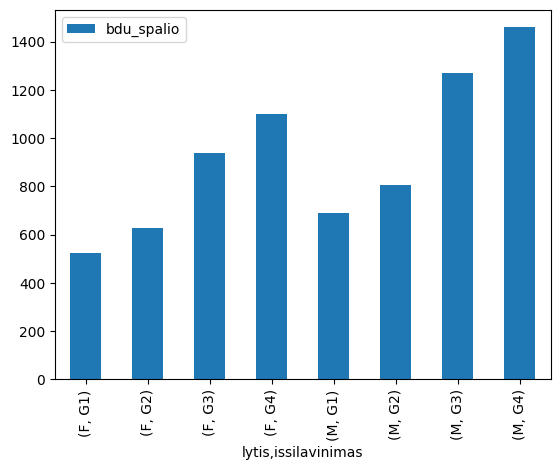

In [78]:
dugr.mean(numeric_only=True).plot(kind='bar')

<Axes: xlabel='lytis'>

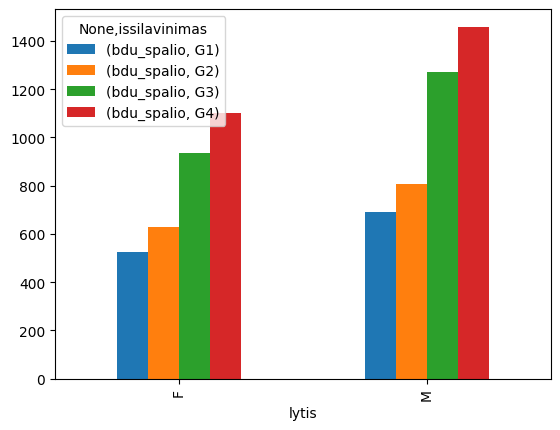

In [80]:
dugr.mean(numeric_only=True).unstack().plot(kind='bar')

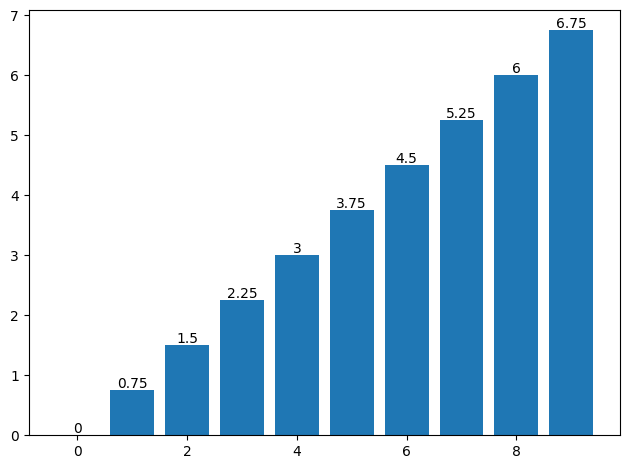

In [81]:
x=np.arange(0, 10) # ? - list with labels
fig, axis = plt.subplots()
#plotting code:
P = axis.bar(x, x*0.75)
axis.bar_label(P)

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [132]:
# sugrupuokite dus2018 pagal išssilavinimą, suraskite vidutinį atlyginimą++
#  sugrupuokite pagal amžiaus grupes, suraskite vidutinį atlyginimą++
# Sugrupuokite pagal amžiaus grupes IR išsilavinimą, atskirai vyrus, atskirai moteris, suraskite vidutinius atlyginimus.
# pritaikytkite ką tik rodytą informaciją ir
# vizualizuokite barais priklausomybę tarp išssilavinimo, amžiaus grupės ir vidutiniio atlyginimo
#dus18.mean(numeric_only=True)
#rez=[['issilavinimas','bdu_spalio','amzius','lytis']]
rez1 = dus18.query('lytis == "M').groupby(by=['amzius','issilavinimas'])
rez1.groups.keys()
rez1.mean(numeric_only=True).unstack().plot(kind='bar')

TokenError: ('unterminated string literal (detected at line 1)', (1, 10))

In [124]:
#  sugrupuokite pagal amžiaus grupes, suraskite vidutinį atlyginimą
rez2 = rez.groupby(by=['amzius'])
rez2.mean(numeric_only=True).unstack()

            amzius
bdu_spalio  14-29      865.563301
            30-39     1088.955721
            40-49      980.855429
            50-59      856.067124
            60+        784.542386
dtype: float64

<Axes: xlabel='None,issilavinimas'>

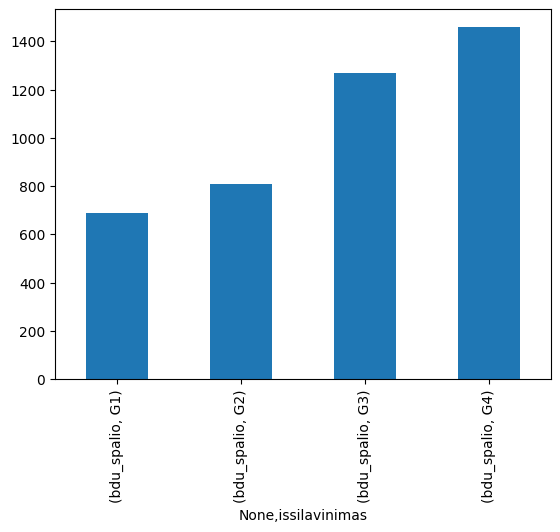

In [114]:
# Sugrupuokite pagal amžiaus grupes IR išsilavinimą, atskirai vyrus, atskirai moteris, suraskite vidutinius atlyginimus.
# pritaikytkite ką tik rodytą informaciją ir
# vizualizuokite barais priklausomybę tarp išssilavinimo, amžiaus grupės ir vidutiniio atlyginimo
vyrai= rez.query('lytis =="M"')
moterys = rez.query('lytis =="F"')
# rez3= rez.groupby(by=['amzius','issilavinimas',])
vyrai1 = vyrai.groupby(by=['issilavinimas'])
vyrai1.mean(numeric_only=True).unstack().plot(kind='bar')


<Axes: xlabel='None,issilavinimas'>

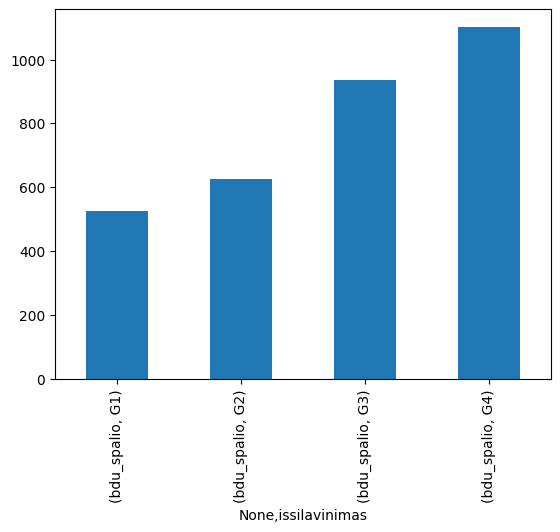

In [122]:
moterys1 = moterys.groupby(by=['issilavinimas'])
moterys1.mean(numeric_only=True).unstack().plot(kind='bar')
                  

In [130]:
rez.groupby(by='issilavinimas','amzius').mean(numeric_only=True)


SyntaxError: positional argument follows keyword argument (2619135060.py, line 1)

In [133]:
bydus18=pd.read_csv('DUS2018.csv')
du18=dus18[['lytis', 'issilavinimas', 'bdu_spalio', 'amzius']]
du18.head(5)
issilav_gr = du18['issilavinimas'].value_counts().index
print(issilav_gr)
for issilav in issilav_gr:
    atr_issil = du18.query('issilavinimas==@issilav')
    vid_atl = atr_issil['bdu_spalio'].mean()
    print('Išsilavinimo grupė', issilav, 'vidutinis atlyginimas', vid_atl)
du18.groupby(by='issilavinimas').mean(numeric_only=True)

Index(['G2', 'G3', 'G4', 'G1'], dtype='object', name='issilavinimas')
Išsilavinimo grupė G2 vidutinis atlyginimas 732.6871572212066
Išsilavinimo grupė G3 vidutinis atlyginimas 1094.7640256572408
Išsilavinimo grupė G4 vidutinis atlyginimas 1246.4511960095226
Išsilavinimo grupė G1 vidutinis atlyginimas 626.3916786226686


,bdu_spalio
issilavinimas,
G1,626.391679
G2,732.687157
G3,1094.764026
G4,1246.451196


In [134]:
amz_gr = du18['amzius'].value_counts().index
for amz in amz_gr:
    atr_amz = du18.query('amzius==@amz')
    vid_atl = atr_amz['bdu_spalio'].mean()
    print('Amžiaus grupė', amz, 'vidutinis atlyginimas', vid_atl)

Amžiaus grupė 50-59 vidutinis atlyginimas 856.0671241050119
Amžiaus grupė 40-49 vidutinis atlyginimas 980.8554293599406
Amžiaus grupė 14-29 vidutinis atlyginimas 865.5633005977796
Amžiaus grupė 30-39 vidutinis atlyginimas 1088.9557207498383
Amžiaus grupė 60+ vidutinis atlyginimas 784.542386341076


<Axes: xlabel='amzius'>

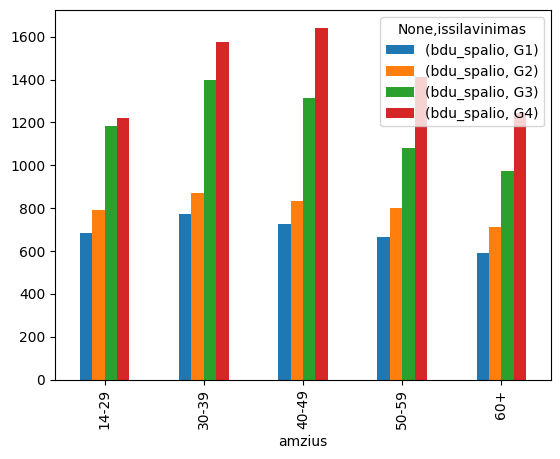

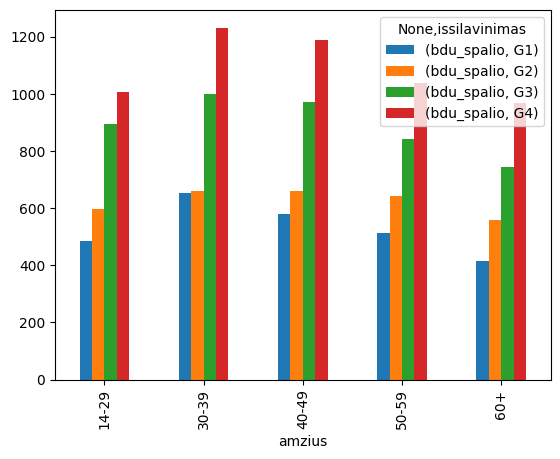

In [136]:
du18.groupby(by='amzius').mean(numeric_only=True)
dugr= du18.query('lytis=="M"').groupby(by=['amzius', 'issilavinimas'])
#dugr.groups.keys()
dugr.mean(numeric_only=True).unstack().plot(kind='bar')
dugr= du18.query('lytis=="F"').groupby(by=['amzius', 'issilavinimas'])
#dugr.groups.keys()
dugr.mean(numeric_only=True).unstack().plot(kind='bar')

In [148]:
#miestai.sort_values(by='Atstumas iki sostinės').tail()
#surasti 5 seniausius ir 5 naujausiu meistus
miestai.sort_values(by='miesto amzius').tail()


,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius,miesto amzius,miesto teisiu amzius
13,Ukmergė,72,1201,1792 m.,16,20391,823.0,232.0
57,Švenčionys,84,1201,1800 m.,16,4139,823.0,224.0
56,Trakai,27,1201,XIV a. pab. – XV a. pr.,16,4238,823.0,-1.0
40,Pasvalys,182,1201,1946 m.,11,6490,823.0,78.0
78,Ramygala,146,1201,1956 m.,11,1415,823.0,68.0


In [149]:
miestai.sort_values(by='miesto amzius').head()

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius,miesto amzius,miesto teisiu amzius
14,Visaginas,152,1975 m.,1977 m.,10,18185,49.0,47.0
68,Venta,268,1966 m.,1978 m.,14,2213,58.0,46.0
23,Elektrėnai,48,1960 m.,1962 m.,16,11276,64.0,62.0
38,Naujoji Akmenė,269,1952 m.,1952 m.,14,7266,72.0,72.0
85,Baltoji Vokė,35,1950 m.,1958 m.,16,1052,74.0,66.0


In [52]:
# nuskaitykite NYPD.++
#Suraskite, kiek kieviename rajone (BORO) buvo susišaudymų.++
# prisidėkite stulpelį, kuriame būtų tik įvykio laiko valandos++
# Suraskite, kiek ir kokios rasės buvo nusikaltėlių; aukų?
# BONUS ADVANCED: vizualizuokite susišaudymų skaičių kas valandą skirtinguose rajonuose.
nypd= pd.read_csv('NYPD_Shooting.csv', sep=';',parse_dates=['OCCUR_DATE','OCCUR_TIME'])
susisaudymai= nypd['BORO'].value_counts()
print(susisaudymai)
# amz_gr = du18['amzius'].value_counts().index
# for amz in amz_gr:
#     atr_amz = du18.query('amzius==@amz')
#     vid_atl = atr_amz['bdu_spalio'].mean()
#     print('Amžiaus grupė', amz, 'vidutinis atlyginimas', vid_atl)
# du18.groupby(by='amzius').mean(numeric_only=True)
# dugr= du18.query('lytis=="M"').groupby(by=['amzius', 'issilavinimas'])
# mgr = miestaiSuApskritimis.groupby(by='Apskritis_y')
# mgr.groups.keys()
#.groupby()
# nypdsmall= nypd[['DATA', 'BORO', 'STATISTICAL_MURDER_FLAG']]
# nypdsmall.head()

# mgr = miestaisuapskritimis.groupby(by='Apskritis_y')

BORO
BROOKLYN         8913
BRONX            6195
QUEENS           3225
MANHATTAN        2647
STATEN ISLAND     646
Name: count, dtype: int64


C:\Users\37060\AppData\Local\Temp\ipykernel_11360\2107558562.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nypd= pd.read_csv('NYPD_Shooting.csv', sep=';',parse_dates=['OCCUR_DATE','OCCUR_TIME'])


In [53]:
# prisidėkite stulpelį, kuriame būtų tik įvykio laiko valandos
nypd['laikas']= nypd['OCCUR_TIME'].dt.hour
nypd.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude,laikas
0,201575314,2019-08-23,2024-04-15 22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141,22
1,205748546,2019-11-27,2024-04-15 15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571,15
2,193118596,2019-02-02,2024-04-15 19:40:00,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,40.791916,-73.945480,19
3,204192600,2019-10-24,2024-04-15 00:52:00,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,BLACK,25-44,F,BLACK,40.638064,-74.166108,0
4,201483468,2019-08-22,2024-04-15 18:03:00,BRONX,46,0.0,NaN,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,40.854547,-73.913339,18


In [58]:
rase= nypd['PERP_RACE'].value_counts().reset_index()
print('SAUDYTOJU KIEKIS',rase)

auku= nypd['VIC_RACE'].value_counts().reset_index()
print("AUKU KIEKIS",auku)

SAUDYTOJU KIEKIS                         PERP_RACE  count
0                           BLACK   9336
1                         UNKNOWN   1839
2                  WHITE HISPANIC   1827
3                  BLACK HISPANIC   1007
4                           WHITE    239
5        ASIAN / PACIFIC ISLANDER    105
6  AMERICAN INDIAN/ALASKAN NATIVE      2
AUKU KIEKIS                          VIC_RACE  count
0                           BLACK  15470
1                  WHITE HISPANIC   3105
2                  BLACK HISPANIC   2085
3                           WHITE    578
4        ASIAN / PACIFIC ISLANDER    286
5                         UNKNOWN     93
6  AMERICAN INDIAN/ALASKAN NATIVE      9


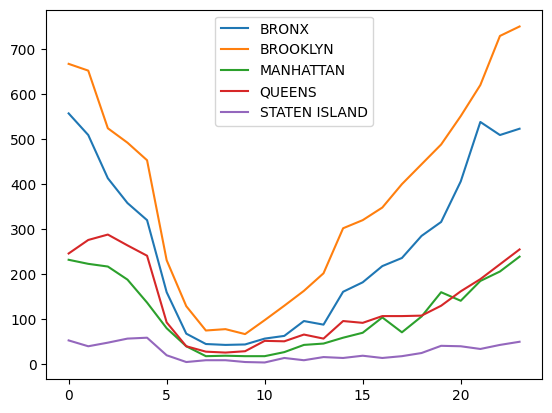

In [85]:
# BONUS ADVANCED: vizualizuokite susišaudymų skaičių kas valandą skirtinguose rajonuose.

#nypd.groupby(by='BORO')
nygr= nypd.groupby('BORO')

fig, ax = plt.subplots()

for i in nygr.groups.keys():
    h= nygr.get_group(i)['laikas'].value_counts().sort_index()
    ax.plot(h.index, h.values, label=i)
ax.legend(loc='best')

plt.show()

# du18.groupby(by='amzius').mean(numeric_only=True)
# dugr= du18.query('lytis=="M"').groupby(by=['amzius', 'issilavinimas'])
# #dugr.groups.keys()
# dugr.mean(numeric_only=True).unstack().plot(kind='bar')
# dugr= du18.query('lytis=="F"').groupby(by=['amzius', 'issilavinimas'])
# #dugr.groups.keys()
# dugr.mean(numeric_only=True).unstack().plot(kind='bar')

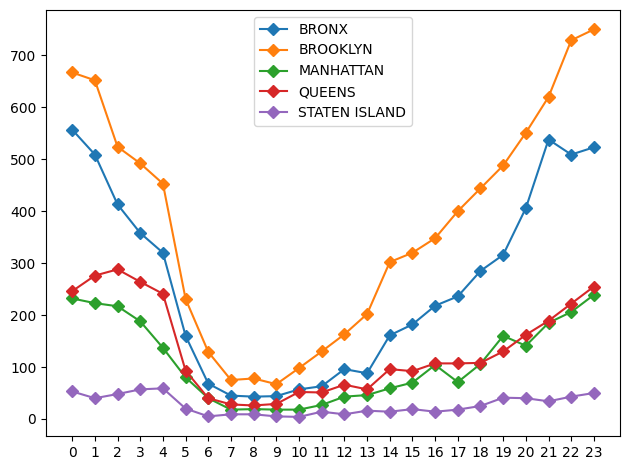

In [6]:
nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_TIME'])
nypd['H'] = nypd['OCCUR_TIME'].dt.hour
nypd = nypd[['BORO', 'PERP_RACE','VIC_RACE','H']]

nypdgr = nypd.groupby('BORO')

fig, axis = plt.subplots()
#plotting code:
for group in nypdgr.groups.keys():
    h = nypdgr.get_group(group)['H'].value_counts().sort_index()
    axis.plot(h.index, h.values, label=group, marker='D')

axis.set_xticks(h.index)

axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

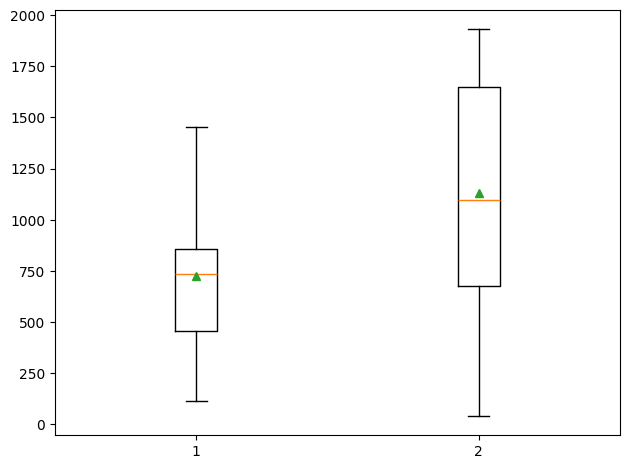

In [20]:
a = np.random.randint(10,1500,25)
b = np.random.rand(25)
c = np.random.randint(5, 2000,25)
d= c*b

#:sfig

fig, axis = plt.subplots()
#plotting code
axis.boxplot(a,showmeans=True) #rodo vidurkį
axis.boxplot(c, showmeans=True, positions=[2])

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

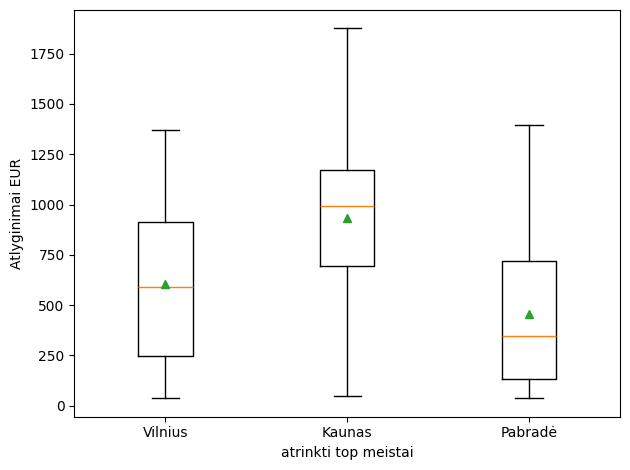

In [26]:
a = np.random.randint(10,1500,25)
b = np.random.rand(25)
c = np.random.randint(5, 2000,25)
d= c*b

data=[a,c,d]

#:sfig

fig, axis = plt.subplots()
#plotting code
axis.boxplot(data,showmeans=True) #rodo vidurkį


axis.set_ylabel('Atlyginimai EUR')
axis.set_xlabel('atrinkti top meistai')

axis.set_xticklabels(['Vilnius','Kaunas','Pabradė'])

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show

In [45]:
life= pd.read_csv('life-exp.csv')
gov= pd.read_csv('gov-forms.csv')

lifegov= pd.merge(left=life, right= gov,left_on='Entity', right_on='Name', how='inner')
lifegov.head()


# Ar yra priklausomybė tarp vidutinės gyvenimo trukmės ir konstitucinės valdymo formos?
lifegov219= lifegov.query('Year == 2019')
lifegov2= lifegov219.groupby(by='Constitutional form')

for i in lifegov2.groups.keys():
    vidurkis = lifegov2.get_group(i)['Life expectancy'].mean()
    print(i, vidurkis)

# Suraskite 3kias valstybes, kuriose 2019 metais buvo trumpiausia gyvenimo trukmė.
lg= lifegov219.sort_values(by='Life expectancy')
best=lg.head(3)
best

# nypdsmall[['MonthName','MonthNumber']].value_counts().reset_index().sort_values(by='MonthNumber')
# bei 3, kuriose buvo ilgiausia. hint: sort_values(by=), tail, head
# ADVANCED:
# su query() ir for ciklais, .plot() komanda atavizduokite šių atrinktų valstybių
# istorinius gyvenimo
# trukmės duomenis


Absolute monarchy 72.262
Constitutionalmonarchy 77.18336842105265
Provisional 64.17133333333334
Republic 71.9582089552239


,Entity,Code,Year,Life expectancy,Name,Constitutional form,Head of state,Basis of executive legitimacy
11679,Central African Republic,CAF,2019,53.283,Central African Republic,Republic,Executive,Presidency is independent of legislature
11680,Chad,TCD,2019,54.239,Chad,Provisional,NONE,No constitutionally-defined basis to current r...
11735,Lesotho,LSO,2019,54.331,Lesotho,Constitutionalmonarchy,Ceremonial,Ministry is subject to parliamentary confidence


In [46]:
# bei 3, kuriose buvo ilgiausia. hint: sort_values(by=), tail, head
worst=lg.tail(3)
worst

,Entity,Code,Year,Life expectancy,Name,Constitutional form,Head of state,Basis of executive legitimacy
11725,Japan,JPN,2019,84.629,Japan,Constitutionalmonarchy,Ceremonial,Ministry is subject to parliamentary confidence
11787,San Marino,SMR,2019,84.972,San Marino,Republic,Executive,Presidency is elected by legislature; ministry...
11752,Monaco,MCO,2019,86.751,Monaco,Constitutionalmonarchy,Executive,Monarch personally exercises power in concert ...


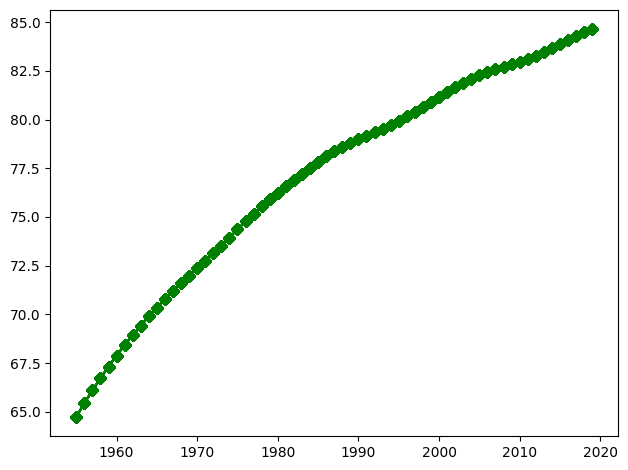

In [69]:
# ADVANCED:
# su query() ir for ciklais, .plot() komanda atavizduokite šių atrinktų valstybių
# istorinius gyvenimo
# trukmės duomenis
ligovj= lifegov.query('Entity=="Japan"')
ligovj.head()
fig, axis= plt.subplots()
for i in ligovj:
    h=ligovj['Year'].value_counts().sort_index()
    j=ligovj['Life expectancy'].value_counts().sort_index()
    axis.plot(h.index, j.index,color= 'green', label= group, marker='D')
fig.tight_layout()
plt.show()

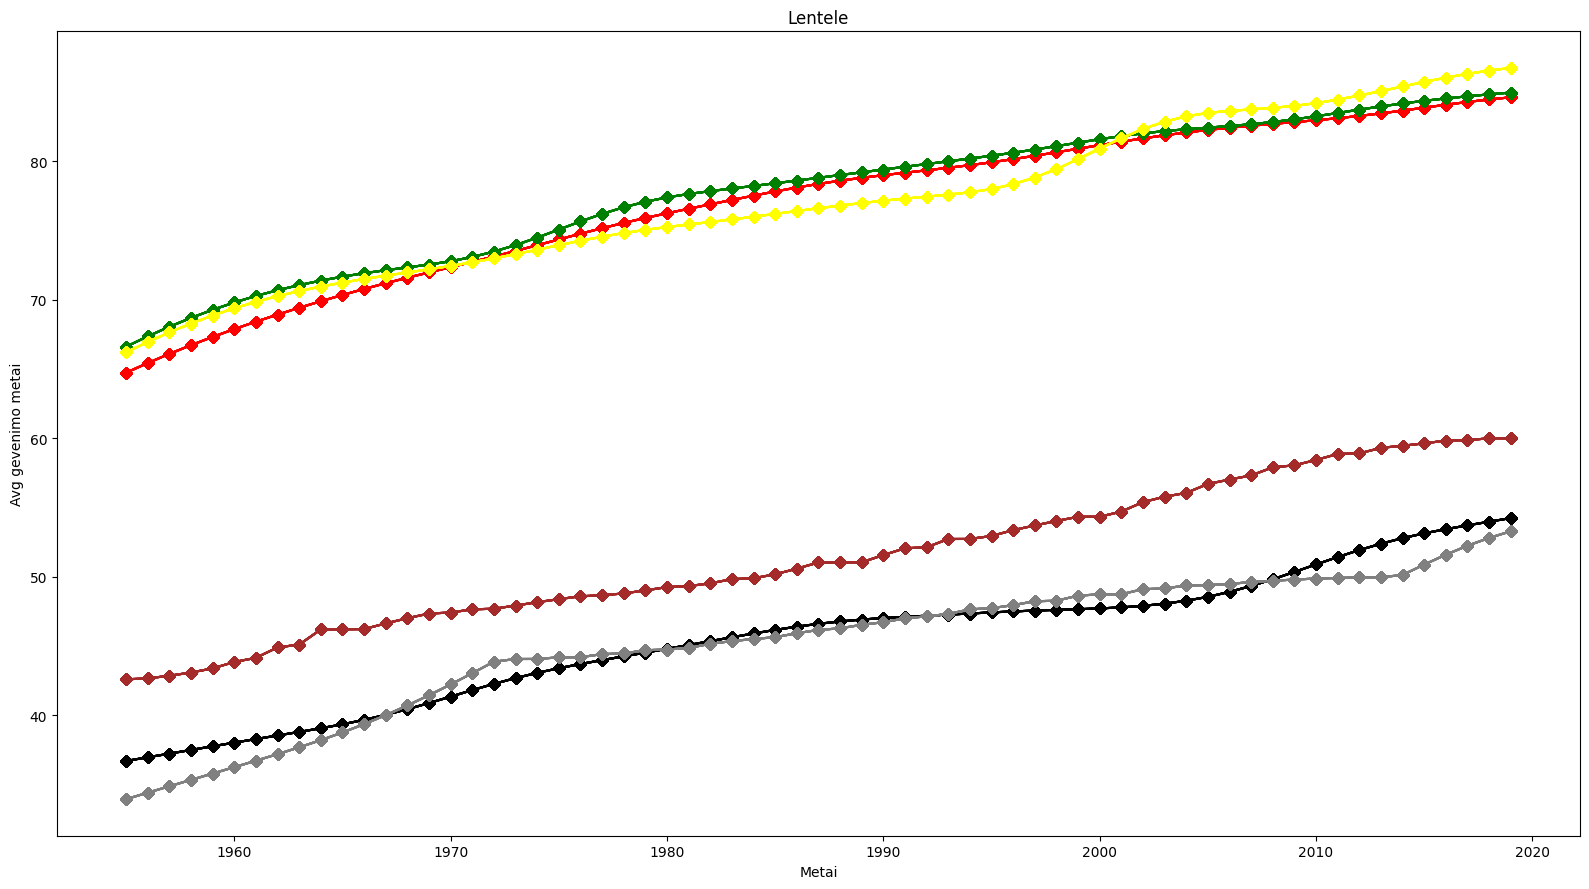

In [97]:
ligovj= lifegov.query('Entity=="Japan"')
ligovj.head()
fig, axis= plt.subplots(figsize=[16,9])
for i in ligovj:
    h=ligovj['Year'].value_counts().sort_index()
    j=ligovj['Life expectancy'].value_counts().sort_index()
    axis.plot(h.index, j.index,color= 'red', label= group, marker='D')
ligovsm= lifegov.query('Entity=="San Marino"')
for i in ligovsm:
    h=ligovsm['Year'].value_counts().sort_index()
    j=ligovsm['Life expectancy'].value_counts().sort_index()
    axis.plot(h.index, j.index,color= 'green', label= group, marker='D')
ligovm= lifegov.query('Entity=="Monaco"')
for i in ligovm:
    h=ligovm['Year'].value_counts().sort_index()
    j=ligovm['Life expectancy'].value_counts().sort_index()
    axis.plot(h.index, j.index,color= 'yellow', label= group, marker='D')

ligovc= lifegov.query('Entity=="Chad"')
for i in ligovc:
    h=ligovc['Year'].value_counts().sort_index()
    j=ligovc['Life expectancy'].value_counts().sort_index()
    axis.plot(h.index, j.index,color= 'black', label= group, marker='D')

ligovAF= lifegov.query('Entity=="Central African Republic"')
for i in ligovAF:
    h=ligovAF['Year'].value_counts().sort_index()
    j=ligovAF['Life expectancy'].value_counts().sort_index()
    axis.plot(h.index, j.index,color= 'grey', label= group, marker='D')

ligovL= lifegov.query('Entity=="Lesotho"')
for i in ligovL:
    h=ligovL['Year'].value_counts().sort_index()
    j=ligovL['Life expectancy'].value_counts().sort_index()
    axis.plot(h.index, j.index,color= 'brown', label= group, marker='D')
axis.set_xlabel('Metai')
axis.set_ylabel('Avg gevenimo metai')
axis.set_title('Lentele')

fig.tight_layout()
plt.show()


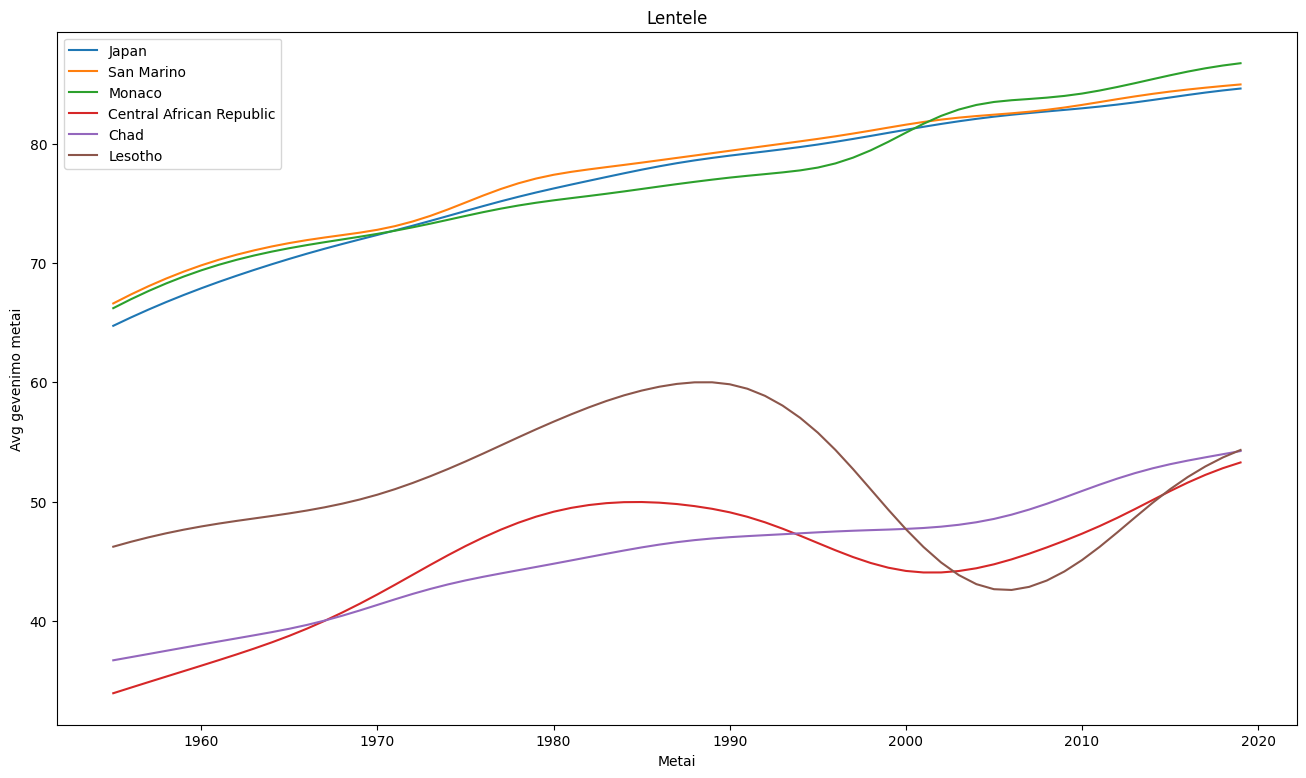

In [112]:
fig, axis= plt.subplots(figsize=[16,9])
for country in worst['Entity']:
    h=lifegov.query('Entity==@country')[['Year','Life expectancy']].sort_values(by='Year')
    axis.plot(h['Year'],h['Life expectancy'],label=country)
    axis.set_xlabel('Metai')
    axis.set_ylabel('Avg gevenimo metai')
    axis.set_title('Lentele')

for country in best['Entity']:
    h=lifegov.query('Entity==@country')[['Year','Life expectancy']].sort_values(by='Year')
    axis.plot(h['Year'],h['Life expectancy'],label=country)
    axis.set_xlabel('Metai')
    axis.set_ylabel('Avg gevenimo metai')
    axis.set_title('Lentele')


axis.legend(loc='best')
plt.show()

In [112]:
# Nuskaitykite auto.csv failą.
auto=pd.read_csv('auto.csv', sep= "|")
auto.head()
autosmall= auto[['gamintojas','price','pagaminimo_data']]
# Suraskite 5-kis automobilių gamintojus, kurių gaminamų automobilių
# vidutinė kaina yra didžiausia.
def konv(sk):
    sk=sk.replace(' ','')
    tr= float(sk)
    return tr
autosmall['price']= autosmall['price'].apply(konv)

autosmall.head()

autos=autosmall.groupby(by='gamintojas')['price'].mean().sort_values(ascending=True)
autos.tail()


# tada suraskite 5-kis gamintojus, kurių parduodamų automobilių vidutinis
# amžius yra didžiausias.

def amzius(konv):
    konvertacija= 2024-float(konv[:4])
    return konvertacija
autosmall['amzius']= autosmall['pagaminimo_data'].apply(amzius)

autold= autosmall.groupby(by='gamintojas')['amzius'].mean().sort_values(ascending=False)
autold.head()

gamintojas
GAZ        58.25
Lincoln    55.00
Lada       42.50
Pontiac    41.50
UAZ        35.00
Name: amzius, dtype: float64

In [166]:
auto.head()

,index,id,gamintojas,modelis,pagaminimo_data,rida,variklis,kuro_tipas,varantieji_ratai,pavaros,...,service_book,warranty,catalytic_converter,multiple_key_sets,double_wheels,folding_seats,insulated_glass,two_sliding_doors,personal_ventilation,personal_illumination
0,0,ID:22996628,BMW,M5,2005-12,253 000 km,"4999 cm³, 507 AG (373kW)",Benzinas,Galiniai,Automatinė,...,0,0,0,0,0,0,0,0,0,0
1,1,ID:23120069,Mitsubishi,Outlander,2006,195 405 km,"2378 cm³, 160 AG (118kW)",Benzinas,Visi varantys (4х4),Automatinė,...,0,0,0,0,0,0,0,0,0,0
2,2,ID:23012308,Seat,Arona,2019-11,129 800 km,"1598 cm³, 95 AG (70kW)",Dyzelinas,Priekiniai,Automatinė,...,0,0,0,0,0,0,0,0,0,0
3,3,ID:23051810,Skoda,Octavia Scout,2015-06,183 000 km,"1798 cm³, 179 AG (132kW)",Benzinas,Visi varantys (4х4),Automatinė,...,0,0,0,0,0,0,0,0,0,0
4,4,ID:23117259,Volvo,XC90,2018-08,127 896 km,"1969 cm³, 235 AG (173kW)",Dyzelinas,Visi varantys (4х4),Automatinė,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# nuskaitykite dus2014 ir dus2018 failus. 
dus14= pd.read_csv('DUS2014.csv')
dus18= pd.read_csv('DUS2018.csv')

# Suraskite vidutinius atlyginimus pagal išsilavinimo pakopą tiek 2014 tiek 2018 metams.
dus14gr= dus14.groupby(by='issilavinimas')['bdu_spalio'].mean().sort_values(ascending=True).reset_index()
dus18gr= dus18.groupby(by='issilavinimas')['bdu_spalio'].mean().sort_values(ascending=True).reset_index()
dus18gr.head()
# Šiuos atlyginimus sudėkite į dataframe'us (reset_index()), juos sujunkite su merge į bedrą naują lentelę,
abu= pd.merge(left= dus14gr, right= dus18gr,left_on='issilavinimas',right_on='issilavinimas',how='inner')
abu.head()
# pridėkite naują stulpelį, kur būtų apsakičiuotas pokytis tarp 2041 ir 2018 metų, procentais.
def bdu(proc):
    konvo= proc/3.4528
    return konvo
abu['bdu_spalio_x']= dus14gr['bdu_spalio'].apply(bdu)
abu['pokytis %']=(abu['bdu_spalio_y']/abu['bdu_spalio_x']-1)*100
abu.head()
#     def amzius(konv):
#     konvertacija= 2024-float(konv[:4])
#     return konvertacija
# autosmall['amzius']= autosmall['pagaminimo_data'].apply(amzius)

,issilavinimas,bdu_spalio_x,bdu_spalio_y,pokytis %
0,G1,474.744650,626.391679,31.942862
1,G2,543.892581,732.687157,34.711739
2,G3,730.410678,1094.764026,49.883354
3,G4,1011.965397,1246.451196,23.171326


In [7]:
#suraskite pokytį tarp vidutinių atlyginimų  2014 ir 2018 metams, procentais.
#pagal amžiaus grupes
#  h=lifegov.query('Entity==@country')[['Year','Life expectancy']].sort_values(by='Year')
dus14= pd.read_csv('DUS2014.csv')
dus18= pd.read_csv('DUS2018.csv')

def fn(amz):
    if amz == '14-19' or amz== '20-29':
        return '14-29'
    else:
        return amz
dus14['amzius']= dus14['amzius'].apply(fn)







dus14g= dus14.groupby(by='amzius')['bdu_spalio'].mean().reset_index()
dus18g= dus18.groupby(by='amzius')['bdu_spalio'].mean().reset_index()

#dus14super= pd.merge(left= dus14g1, right=dus14g2, left_on='bdu_spalio',right_on='bdu_spalio',how='inner')

abudu= pd.merge(left= dus14g, right= dus18g,left_on='amzius',right_on='amzius',how='inner')
abudu.head()

def bdu(proc):
    konvo= proc/3.4528
    return konvo
abudu['bdu_spalio_x']= dus14g['bdu_spalio'].apply(bdu)
abudu['pokytis %']=(abudu['bdu_spalio_y']/abudu['bdu_spalio_x']-1)*100
abudu.head()

,amzius,bdu_spalio_x,bdu_spalio_y,pokytis %
0,14-29,599.366241,865.563301,44.413089
1,30-39,795.907989,1088.955721,36.819298
2,40-49,700.619410,980.855429,39.998324
3,50-59,666.763134,856.067124,28.391490
4,60+,626.854754,784.542386,25.155370


In [10]:
dus18= dus18[['lytis','amzius','issilavinimas','bdu_spalio']]
dus18.head()

,lytis,amzius,issilavinimas,bdu_spalio
0,F,40-49,G2,460
1,M,50-59,G2,1487
2,M,40-49,G2,1500
3,M,50-59,G2,1500
4,F,40-49,G2,400


SyntaxError: invalid syntax (996659071.py, line 1)

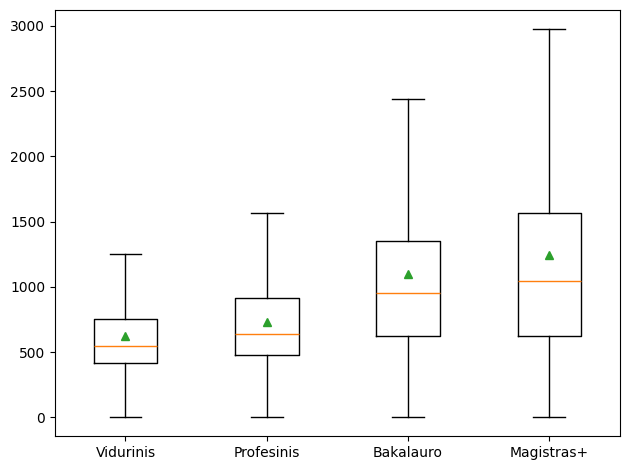

In [19]:
# boxplot()
atl_g1 = dus18.query('issilavinimas == "G1"')['bdu_spalio'].values
atl_g2 = dus18.query('issilavinimas == "G2"')['bdu_spalio'].values
atl_g3 = dus18.query('issilavinimas == "G3"')['bdu_spalio'].values
atl_g4 = dus18.query('issilavinimas == "G4"')['bdu_spalio'].values

atlyginimai= [atl_g1, atl_g2, atl_g3, atl_g4]
edus=['Vidurinis','Profesinis','Bakalauro', 'Magistras+']
fig, axis = plt.subplots()
#plotting code:

axis.boxplot(atlyginimai, showmeans=True, showfliers=False) #flieriai dingsta tik vizualiai, neafectina statistikos

axis.set_xticklabels(edus)

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

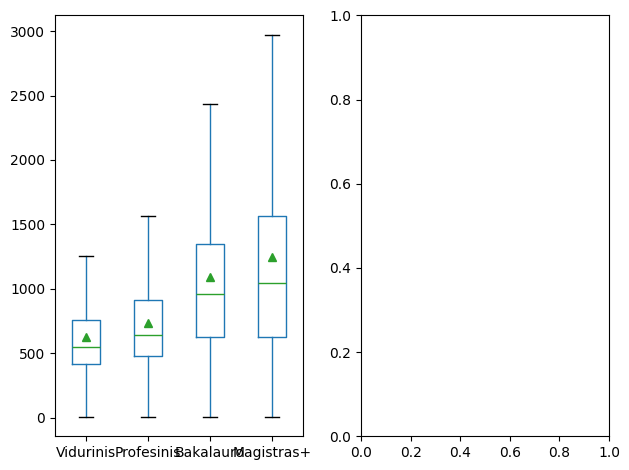

In [33]:
# II boxplot()

fig,(left, right)= plt.subplots(1,2)

axis= dus18.groupby(by='issilavinimas').boxplot(column='bdu_spalio',subplots=False,showmeans= True, showfliers= False, ax=left)

left.grid(False)
axis.set_xticklabels(edus)
fig.tight_layout()
plt.show()

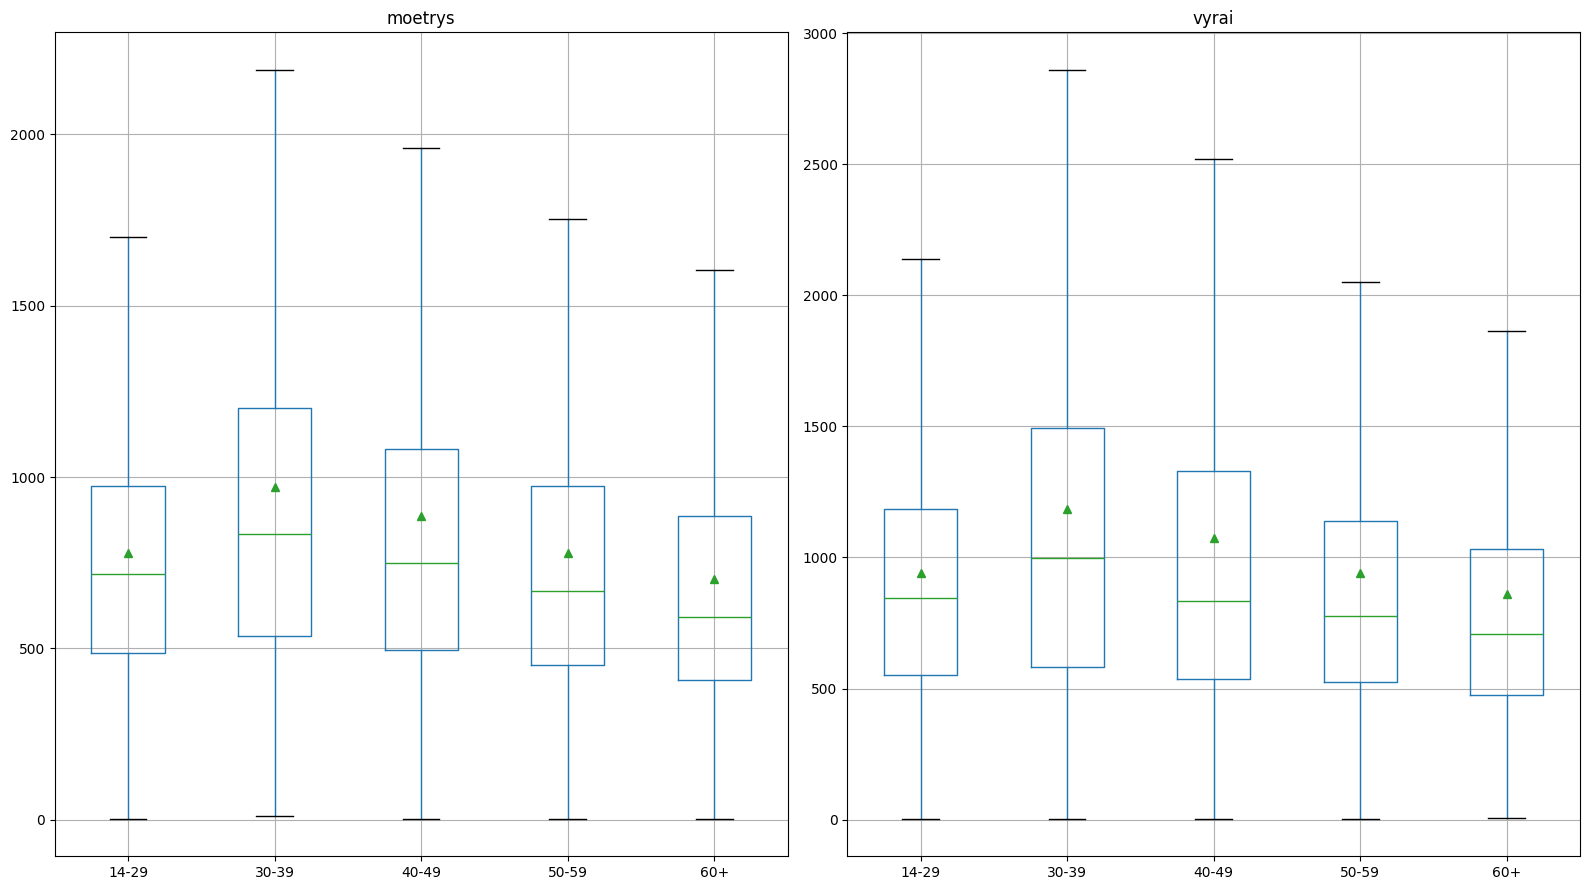

In [46]:
# # sudėkite vizualizaciją boxplotais 2018 metų atlyginimų, pagal amžiaus grupes.
#  su subplots() sukurkite 2 grafikus, kairiajame parodykite moterų statistiką, dešiniąjame - vyrų. 
# Prisiminkite ir sudėkite ašių pavadinimus

fig,(left, right)= plt.subplots(1,2, figsize=[16,9])

labeliai=('14-29','30-39','40-49','50-59','60+')

axx= dus18.query('lytis == "F"')
axis= axx.groupby('amzius').boxplot(column='bdu_spalio',subplots=False,showmeans= True, showfliers= False, ax=left)
axx2= dus18.query('lytis == "M"')
axis2= axx2.groupby('amzius').boxplot(column='bdu_spalio',subplots=False,showmeans= True, showfliers= False, ax=right)

axis.set_xticklabels(labeliai)
axis2.set_xticklabels(labeliai)
axis.set_title('moetrys')

axis2.set_title('vyrai')
plt.tight_layout()
plt.show()

In [47]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [167]:
import seaborn as sns

In [52]:
plt.style.use(style='default')

<Axes: xlabel='amzius', ylabel='bdu_spalio'>

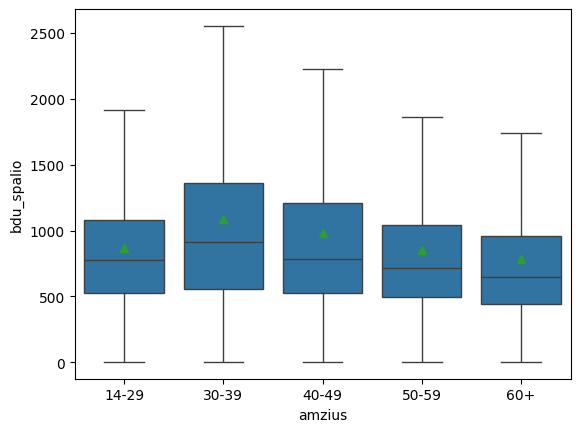

In [55]:
sns.boxplot(data=dus18.sort_values(by='amzius'), x='amzius', y = 'bdu_spalio',showmeans=True, showfliers= False) #x- stulpelio pav

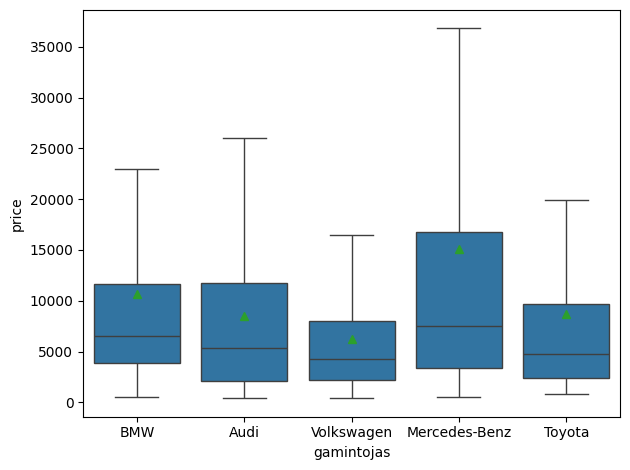

In [82]:
# auto.csv:
# nuskaitykite jį, kainą į skaičių paverskite
# Su boxplotu vizualizuokite 5kių gamintojų, daugiausiai turinčių modelių skelbimuose,
# kainų pasiskirstymus.
auto=pd.read_csv('auto.csv', sep= "|")
auto=auto[['gamintojas','price']]
def konv(sk):
    sk=sk.replace(' ','')
    tr= float(sk)
    return tr
auto['price']= auto['price'].apply(konv)
autopls=auto['gamintojas'].value_counts().sort_values(ascending=True)
gamintojai=autopls.tail().index
sns.boxplot(data=auto.query('gamintojas in @gamintojai'), x='gamintojas', y = 'price',showmeans=True, showfliers= False)
#sns.boxplot(data=auto.query('gamintojas =="Volkswagen"'), x='gamintojas', y = 'price',showmeans=True, showfliers= False)
#sns.boxplot(data=auto.query('gamintojas =="Audi"'), x='gamintojas', y = 'price',showmeans=True, showfliers= False)
#sns.boxplot(data=auto.query('gamintojas =="Mercedes-Benz"'), x='gamintojas', y = 'price',showmeans=True, showfliers= False)
#sns.boxplot(data=auto.query('gamintojas =="Toyota"'), x='gamintojas', y = 'price',showmeans=True, showfliers= False)
plt.tight_layout()
plt.show()
#nypdsmall['MonthName'].value_counts().sort_values(ascending=True)

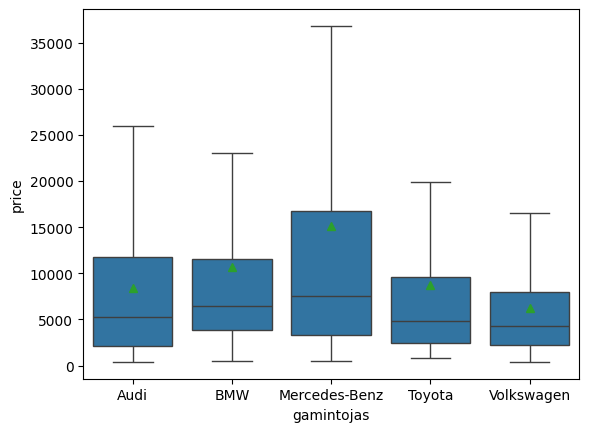

In [83]:
auto = pd.read_csv('auto.csv', sep='|')[['gamintojas','price','modelis','rida']]
auto['price'] = auto['price'].str.replace(' ','').apply(float)
g = list(auto['gamintojas'].value_counts().sort_values(ascending=False).index[:5])
sns.boxplot(data=auto.query('gamintojas in @g').sort_values(by='gamintojas'), x='gamintojas', y='price', showmeans=True, showfliers=False)
plt.show()

In [84]:
#.dt
#.str
auto.head()

,gamintojas,price,modelis,rida
0,BMW,19500.0,M5,253 000 km
1,Mitsubishi,2700.0,Outlander,195 405 km
2,Seat,13490.0,Arona,129 800 km
3,Skoda,14650.0,Octavia Scout,183 000 km
4,Volvo,38000.0,XC90,127 896 km


In [88]:
auto['G']=auto['gamintojas'].str.upper().str[:3]
auto.head()

,gamintojas,price,modelis,rida,G
0,BMW,19500.0,M5,253 000 km,BMW
1,Mitsubishi,2700.0,Outlander,195 405 km,MIT
2,Seat,13490.0,Arona,129 800 km,SEA
3,Skoda,14650.0,Octavia Scout,183 000 km,SKO
4,Volvo,38000.0,XC90,127 896 km,VOL


In [91]:
pip install requests

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/62.6 kB ? eta -:--:--
   ---------------------------------------  61.4/62.6 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 62.6/62.6 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/163.8 kB ? eta -:--:--
   ------------------------------------- -- 153.6/163.8 kB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 163.8/163.8 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/100.4 kB ? eta -:--:--
   ---------------------------------------- 100.4/100.4 kB 6.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/66.8 kB ? eta -:--:--
   ---------------------------------------- 66.8/66.8 kB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/121.1 kB ? eta -:--:--
   ---------------------------------------- 121.1/121.1 kB 6.9 MB/s eta 0:00:00
Note: you may n

In [166]:
import requests as rq

In [28]:
url= 'https://api.meteo.lt/v1/stations'

response = rq.get(url)

stations = response.json()
print(stations)

[{'code': 'birzu-ams', 'name': 'Biržų AMS', 'coordinates': {'latitude': 56.193191, 'longitude': 24.774184}}, {'code': 'dotnuvos-ams', 'name': 'Dotnuvos AMS', 'coordinates': {'latitude': 55.395993, 'longitude': 23.866224}}, {'code': 'duksto-ams', 'name': 'Dūkšto AMS', 'coordinates': {'latitude': 55.517856, 'longitude': 26.31614}}, {'code': 'kauno-ams', 'name': 'Kauno AMS', 'coordinates': {'latitude': 54.88396, 'longitude': 23.83588}}, {'code': 'klaipedos-ams', 'name': 'Klaipėdos AMS', 'coordinates': {'latitude': 55.73135, 'longitude': 21.09157}}, {'code': 'kybartu-ams', 'name': 'Kybartų AMS', 'coordinates': {'latitude': 54.633167, 'longitude': 22.783011}}, {'code': 'laukuvos-ams', 'name': 'Laukuvos AMS', 'coordinates': {'latitude': 55.60886, 'longitude': 22.239463}}, {'code': 'lazdiju-ams', 'name': 'Lazdijų AMS', 'coordinates': {'latitude': 54.23221, 'longitude': 23.51068}}, {'code': 'nidos-ams', 'name': 'Nidos AMS', 'coordinates': {'latitude': 55.30221, 'longitude': 21.00736}}, {'code'

In [29]:
#iš to responso išrinkite į sąrašą visus ams kodus ('code' raktažodis)
sar=[]
for i in stations:
    sar.append(i['code'])
print(sar)

['birzu-ams', 'dotnuvos-ams', 'duksto-ams', 'kauno-ams', 'klaipedos-ams', 'kybartu-ams', 'laukuvos-ams', 'lazdiju-ams', 'nidos-ams', 'panevezio-ams', 'raseiniu-ams', 'siauliu-ams', 'silutes-ams', 'telsiu-ams', 'ukmerges-ams', 'utenos-ams', 'varenos-ams', 'vilniaus-ams']


In [30]:
url = 'https://api.meteo.lt/v1/stations/vilniaus-ams/observations/2024-04-18'
#rasti visu stociu 00 val air temp

response = rq.get(url)

stations = response.json()
z=[]
for i in sar:
    url='https://api.meteo.lt/v1/stations/'+i+'/observations/2024-04-18'
    response1 = rq.get(url)
    temp = response1.json()
    saras= temp['observations'][0]['airTemperature']
    z.append(saras)

print(z)

[1.9, 4.7, 0.5, 4.6, 3.6, 3.8, 3, 4.3, 4.6, 3.5, 1.2, 2.8, 4, 3.3, 2.5, 0.6, 1.6, 3.5]


In [33]:
df= pd.DataFrame() #Taip sukuri tuščią DataFrame'ą
df['stotis']=sar
df['temperatura']= z 
df.sort_values(by='temperatura',ascending=False).head()

,stotis,temperatura
1,dotnuvos-ams,4.7
8,nidos-ams,4.6
3,kauno-ams,4.6
7,lazdiju-ams,4.3
12,silutes-ams,4.0


In [2]:
#nuskaitykite auto.csv failą į dataframe'ą.++
auto = pd.read_csv('auto.csv', sep='|')[['gamintojas','price','modelis','rida','pagaminimo_data','kuro_tipas']]
# prie lentelės pridėkite naują stulpelį, kur būtų rida, suapvalinta 15 000 km intervalais.++
# apvalinama į aukštesnę pusę:++
#  1 km turi tapti 15 000 km++
# 5600 km turi tapti 15 000 km++
# 15 001 km turi tapti 30 000 km++
# 25 800 km turi tapti 30 000 km++
# 30 001 km turi tapti 45 000 km++
auto['price'] = auto['price'].str.replace(' ','').apply(float)
z=[]
for i in auto['rida']:
    r= i.replace(' ','')
    try:
        r=float(r[:-2])
    except:
        r=0
    r= round(r/15000)

    r=r*15000
    z.append(r)

for i in z:
    auto['rida15']= z
auto.head()
# suskaičiuokite vidutinę kainą kiekvienam ridos intervalui.
# prisiminkite .plot() - atvaizduokite priklausomybę tarp ridos intervalų ir vidutinės kainos tame intervale

# atvaizduokite boxplotu kainų pasiskirstymą nuo kuro rūšies/tipo
# atvaziduokite boxplotu ridos pasiskirstymą nuo kuro rūšies/tipo
# atvaizduokite boxplotas kainos pasiskirstymą nuo ridos (15 000 km intervalais apvalintos)
# atvaizduokite boxplotais ridos pasiskirstymo priklausomybę nuo gamintojo

# pagal jūsų surinktas ir pastebėtas priklausomybes, jei matote:
# M-Benz, 12 metų, benzinas, 210 000 km -
# kokia kaina būtų konkurencinga/logiška/tikėtina? Kodėl?

,gamintojas,price,modelis,rida,pagaminimo_data,kuro_tipas,rida15
0,BMW,19500.0,M5,253 000 km,2005-12,Benzinas,255000
1,Mitsubishi,2700.0,Outlander,195 405 km,2006,Benzinas,195000
2,Seat,13490.0,Arona,129 800 km,2019-11,Dyzelinas,135000
3,Skoda,14650.0,Octavia Scout,183 000 km,2015-06,Benzinas,180000
4,Volvo,38000.0,XC90,127 896 km,2018-08,Dyzelinas,135000


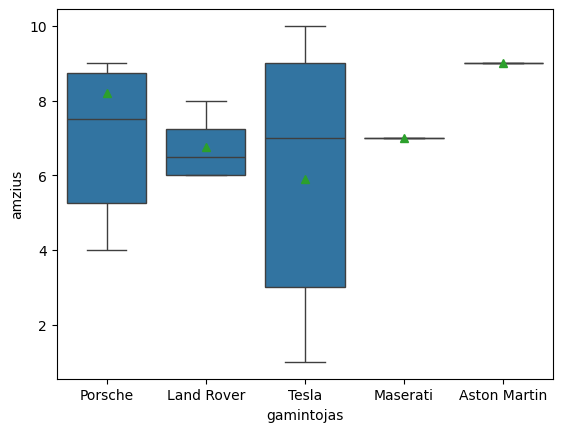

In [35]:
# suraskite visus gamintojus, kurių  modelių vidutinė kaina yra didesnė už vidutinę
# visų automobilių
# kainą. (groupby, reset_index, query)
# Iš jų atrinkite 5-kis brangiausius gamintojus, ir suraskite jų 
# parduodamų modelių vidutinį amžių.
# taip pat atvaizduokite su boxplot'ais šių 5-kių gamintojų parduodamų modelių amžius.
def amzius(konv):
    konvertacija= 2024-float(konv[:4])
    return konvertacija
auto['amzius']= auto['pagaminimo_data'].apply(amzius)

vidkaina= auto['price'].mean()
gam= auto.groupby(by='gamintojas')

gamkaina= auto.groupby('gamintojas').mean(numeric_only=True).reset_index()
gamkaina.rename(columns={'price':'vidprice'},inplace= True)


brangus= gamkaina.query('vidprice > @vidkaina').mean(numeric_only=True).reset_index()
reikalas= gamkaina.query('vidprice > @vidkaina').sort_values('vidprice').tail()
sarasas5= list(reikalas['gamintojas'].head().reset_index()['gamintojas'].values)
amz= gamkaina.query('gamintojas in @sarasas5').groupby('gamintojas').mean(numeric_only=True).reset_index()
amz.head()

autor= sns.boxplot(data= auto.query('gamintojas in @sarasas5'), x='gamintojas', y= 'amzius', showmeans=True, showfliers=False)


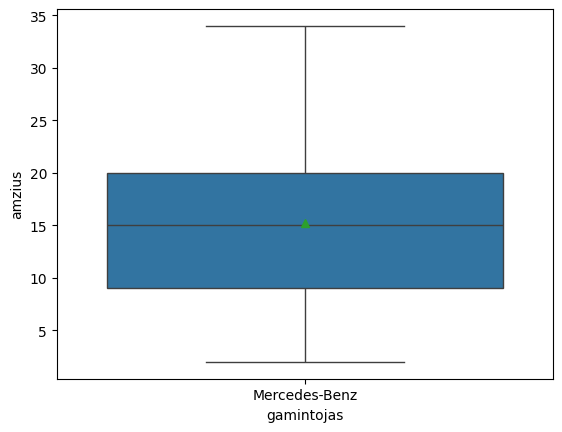

In [39]:
autor1= sns.boxplot(data= auto.query('gamintojas == "Mercedes-Benz"'), x='gamintojas', y= 'amzius', showmeans=True, showfliers=False)


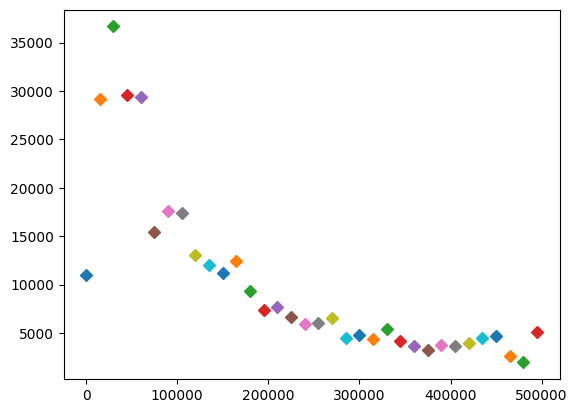

In [4]:
# suskaičiuokite vidutinę kainą kiekvienam ridos intervalui.
# prisiminkite .plot() - atvaizduokite priklausomybę tarp ridos intervalų ir vidutinės kainos tame intervale
aa=auto.query('rida15 < 500000').groupby('rida15')
fig, axis= plt.subplots()
for i in aa.groups.keys():
    h= aa.get_group(i)['price'].mean()
    axis.plot(i, h , label= i, marker='D')

axis.ticklabel_format(style='plain')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


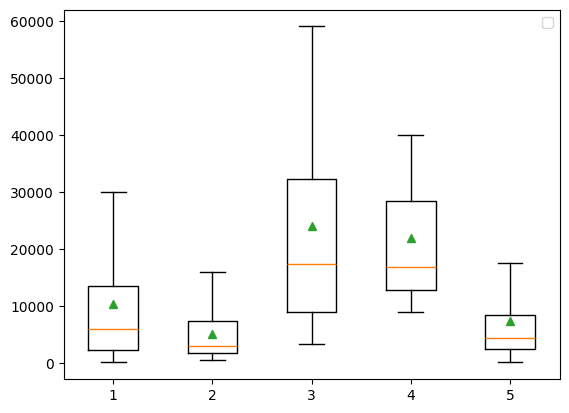

,kuro_tipas,price
0,Benzinas,10409.165017
1,Benzinas / dujos,5151.319588
2,Benzinas / elektra,24133.973684
3,Benzinas / elektra / dujos,21916.333333
4,Dyzelinas,7334.954030


In [19]:
aut= pd.read_csv('auto.csv',sep='|')
auto.head()
# atvaizduokite boxplotu kainų pasiskirstymą nuo kuro rūšies/tipo
aaa=auto.groupby('kuro_tipas')['price'].mean().reset_index()

t = auto.query('kuro_tipas == "Benzinas"')['price'].values
tt = auto.query('kuro_tipas == "Benzinas / dujos"')['price'].values
ttt= auto.query('kuro_tipas == "Benzinas / elektra"')['price'].values
tttt=auto.query('kuro_tipas == "Benzinas / elektra / dujos"')['price'].values
ttttt=auto.query('kuro_tipas == "Dyzelinas"')['price'].values
tall=[t,tt,ttt,tttt,ttttt]


fig, axis= plt.subplots()
axis.boxplot(tall, showmeans=True, showfliers=False)


axis.legend(loc='best')
plt.show()
aaa.head()


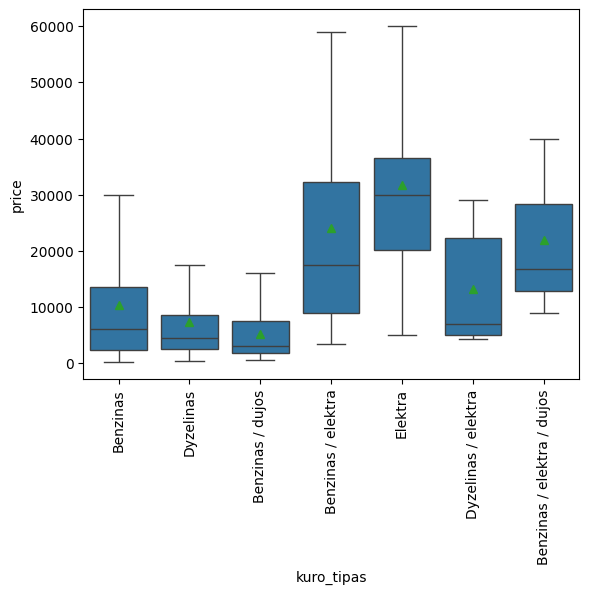

In [24]:
h= sns.boxplot(data = auto, x= 'kuro_tipas',y='price',showmeans= True, showfliers=False)
h.tick_params(axis='x', rotation=90)

In [21]:
auto.head()

,gamintojas,price,modelis,rida,pagaminimo_data,kuro_tipas,rida15,amzius
0,BMW,19500.0,M5,253 000 km,2005-12,Benzinas,255000,19.0
1,Mitsubishi,2700.0,Outlander,195 405 km,2006,Benzinas,195000,18.0
2,Seat,13490.0,Arona,129 800 km,2019-11,Dyzelinas,135000,5.0
3,Skoda,14650.0,Octavia Scout,183 000 km,2015-06,Benzinas,180000,9.0
4,Volvo,38000.0,XC90,127 896 km,2018-08,Dyzelinas,135000,6.0


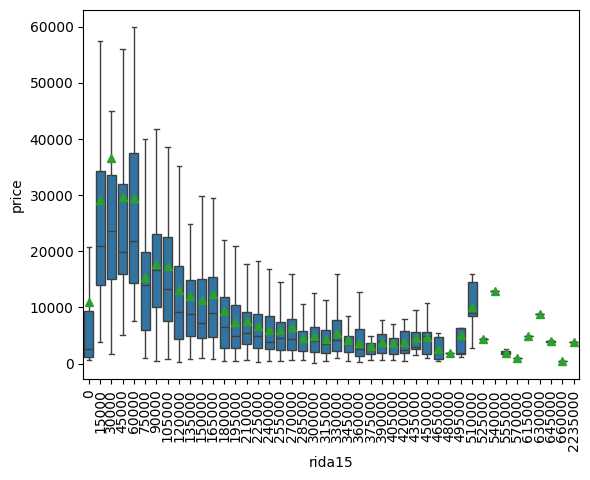

In [26]:
# atvaizduokite boxplotas kainos pasiskirstymą nuo ridos (15 000 km intervalais apvalintos)
h= sns.boxplot(data = auto, x= 'rida15',y='price',showmeans= True, showfliers=False)
h.tick_params(axis='x', rotation=90)

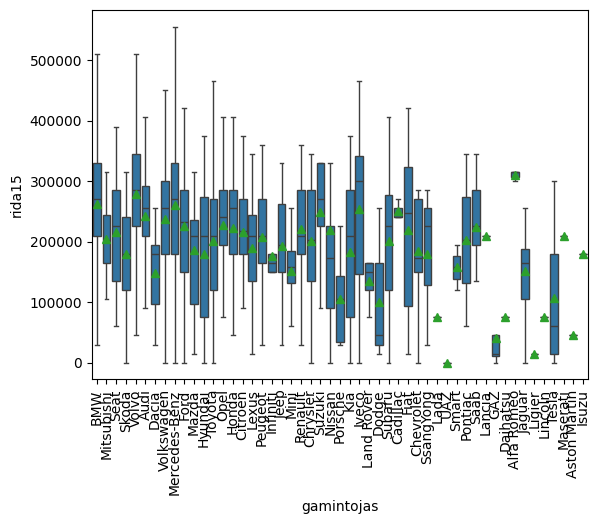

In [28]:
# atvaizduokite boxplotais ridos pasiskirstymo priklausomybę nuo gamintojo
h= sns.boxplot(data = auto, x= 'gamintojas',y='rida15',showmeans= True, showfliers=False)
h.tick_params(axis='x', rotation=90)

In [ ]:
# pagal jūsų surinktas ir pastebėtas priklausomybes, jei matote:
# M-Benz, 12 metų, benzinas, 210 000 km -
# kokia kaina būtų konkurencinga/logiška/tikėtina? Kodėl?